In [1]:
from scipy import ndimage
import pandas as pd
import numpy as np
from numpy import genfromtxt
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

In [3]:
x1 = genfromtxt('data_magV_1.5.csv', delimiter=',')
x2 = genfromtxt('data_magV_1.6.csv', delimiter=',')
x3 = genfromtxt('data_magV_1.7.csv', delimiter=',')
x4 = genfromtxt('data_magV_1.8.csv', delimiter=',')
x5 = genfromtxt('data_magV_1.9.csv', delimiter=',')
x6 = genfromtxt('data_magV_2.1.csv', delimiter=',')
x7 = genfromtxt('data_magV_2.2.csv', delimiter=',')
x8 = genfromtxt('data_magV_2.3.csv', delimiter=',')
x9 = genfromtxt('data_magV_2.4.csv', delimiter=',')
x10 = genfromtxt('data_magV_2.5.csv', delimiter=',')
x11 = genfromtxt('data_magV_2.6.csv', delimiter=',')
x1 = x1.astype('float32')
x2 = x2.astype('float32')
x3 = x3.astype('float32')
x4 = x4.astype('float32')
x5 = x5.astype('float32')
x6 = x6.astype('float32')
x7 = x7.astype('float32')
x8 = x8.astype('float32')
x9 = x9.astype('float32')
x10 = x10.astype('float32')
x11 = x11.astype('float32')

x_train = np.vstack((x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11))
x_train = np.reshape(x_train, (11, 100, 100, 1))

x_test = genfromtxt('data_magV_2.0.csv', delimiter=',')
x_test = x_test.astype('float32')
x_test = np.reshape(x_test, (1, 100, 100, 1))

In [4]:
tsr_train = np.array([1.5, 1.6, 1.7, 1.8, 1.9, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6])
tsr_test = np.array([2.0])

tsr_train = np.reshape(tsr_train, (11, 1, 1, 1))
tsr_test = np.reshape(tsr_test, (1, 1, 1, 1))

In [5]:
input_img = tf.keras.Input(shape=(100, 100, 1), name='input_img')
input_tsr = tf.keras.Input(shape=(1, 1, 1), name='input_tsr')

x = tf.keras.layers.Conv2D(300, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-05))(input_img)
x = tf.keras.layers.MaxPooling2D((5, 5), padding='same')(x)
x = tf.keras.layers.Conv2D(300, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-05))(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(300, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-05))(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

reshape1 = tf.keras.layers.Reshape((encoded.shape[1]*encoded.shape[2]*encoded.shape[3], 1))(encoded)
reshape2 = tf.keras.layers.Reshape((input_tsr.shape[1]*input_tsr.shape[2]*input_tsr.shape[3], 1))(input_tsr)
concatt = tf.keras.layers.Concatenate(axis=1)([reshape1, reshape2])
flatten = tf.keras.layers.Flatten()(concatt)
out = tf.keras.layers.Dense(encoded.shape[1]*encoded.shape[2]*encoded.shape[3], activation='relu')(flatten)
reshape = tf.keras.layers.Reshape((encoded.shape[1], encoded.shape[2], encoded.shape[3]))(out)

x = tf.keras.layers.Conv2D(300, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-05))(reshape)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(300, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-05))(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(300, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-05))(x)
x = tf.keras.layers.UpSampling2D((5, 5))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation=None, padding='same')(x)

# 오토인코더 = 인코더 + 디코더
autoencoder = tf.keras.Model([input_img, input_tsr], decoded)

In [6]:
autoencoder.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 100, 100, 30  3000        ['input_img[0][0]']              
                                0)                                                                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 20, 20, 300)  0           ['conv2d[0][0]']                 
                                                                                              

In [7]:
autoencoder.compile(optimizer = tf.keras.optimizers.Adam(0.001),
                    loss = tf.keras.losses.MeanSquaredError(),
                    metrics=[tf.keras.metrics.MeanAbsoluteError(name="mae"),
                            tf.keras.metrics.MeanAbsolutePercentageError(name="mape"),
                            tf.keras.metrics.RootMeanSquaredError(name="rmse"),
                            tf.keras.metrics.MeanSquaredLogarithmicError(name="msle")])

In [8]:
history = autoencoder.fit([x_train, tsr_train], x_train, epochs=10000, shuffle=True)

Epoch 1/10000
1/1 [==============================] - 3s 3s/step - loss: 55.2784 - mae: 7.0551 - mape: 99.7926 - rmse: 7.4339 - msle: 4.1733
Epoch 2/10000
1/1 [==============================] - 0s 50ms/step - loss: 5277.5640 - mae: 67.0051 - mape: 1159.0818 - rmse: 72.6467 - msle: 5.2144
Epoch 3/10000
1/1 [==============================] - 0s 49ms/step - loss: 46.7963 - mae: 6.4150 - mape: 89.3291 - rmse: 6.8397 - msle: 2.5032
Epoch 4/10000
1/1 [==============================] - 0s 47ms/step - loss: 54.9736 - mae: 7.0337 - mape: 99.4510 - rmse: 7.4134 - msle: 4.1270
Epoch 5/10000
1/1 [==============================] - 0s 48ms/step - loss: 55.1316 - mae: 7.0447 - mape: 99.6265 - rmse: 7.4241 - msle: 4.1706
Epoch 6/10000
1/1 [==============================] - 0s 47ms/step - loss: 54.5170 - mae: 6.9988 - mape: 98.8484 - rmse: 7.3825 - msle: 4.0009
Epoch 7/10000
1/1 [==============================] - 0s 48ms/step - loss: 52.2342 - mae: 6.8246 - mape: 95.8918 - rmse: 7.2263 - msle: 3.4583
Ep

1/1 [==============================] - 0s 46ms/step - loss: 0.7264 - mae: 0.6753 - mape: 11.0519 - rmse: 0.8441 - msle: 0.0143
Epoch 59/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.7158 - mae: 0.6706 - mape: 11.0507 - rmse: 0.8378 - msle: 0.0142
Epoch 60/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.7016 - mae: 0.6671 - mape: 11.2667 - rmse: 0.8292 - msle: 0.0143
Epoch 61/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.7129 - mae: 0.6747 - mape: 11.5088 - rmse: 0.8361 - msle: 0.0147
Epoch 62/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.6938 - mae: 0.6634 - mape: 11.2175 - rmse: 0.8245 - msle: 0.0142
Epoch 63/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.6941 - mae: 0.6603 - mape: 10.9377 - rmse: 0.8248 - msle: 0.0139
Epoch 64/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.6955 - mae: 0.6602 - mape: 10.8805 - rmse: 0.8256 - msle: 0.0138
Epoch 65/10000
1/1 [=

1/1 [==============================] - 0s 45ms/step - loss: 0.4981 - mae: 0.5445 - mape: 9.1878 - rmse: 0.6960 - msle: 0.0102
Epoch 116/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.5395 - mae: 0.5563 - mape: 8.8393 - rmse: 0.7252 - msle: 0.0102
Epoch 117/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.5457 - mae: 0.5797 - mape: 9.8838 - rmse: 0.7294 - msle: 0.0112
Epoch 118/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.4822 - mae: 0.5226 - mape: 8.5448 - rmse: 0.6845 - msle: 0.0095
Epoch 119/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.4648 - mae: 0.5120 - mape: 8.4460 - rmse: 0.6717 - msle: 0.0093
Epoch 120/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.4702 - mae: 0.5236 - mape: 8.8362 - rmse: 0.6757 - msle: 0.0097
Epoch 121/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.4466 - mae: 0.4972 - mape: 8.1700 - rmse: 0.6580 - msle: 0.0089
Epoch 122/10000
1/1 [=

1/1 [==============================] - 0s 48ms/step - loss: 0.2829 - mae: 0.3657 - mape: 6.2059 - rmse: 0.5189 - msle: 0.0060
Epoch 173/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.2825 - mae: 0.3647 - mape: 6.1445 - rmse: 0.5186 - msle: 0.0059
Epoch 174/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.2822 - mae: 0.3671 - mape: 6.2435 - rmse: 0.5183 - msle: 0.0060
Epoch 175/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.2814 - mae: 0.3648 - mape: 6.1205 - rmse: 0.5175 - msle: 0.0058
Epoch 176/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.2802 - mae: 0.3667 - mape: 6.2288 - rmse: 0.5163 - msle: 0.0059
Epoch 177/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.2792 - mae: 0.3632 - mape: 6.0787 - rmse: 0.5154 - msle: 0.0058
Epoch 178/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.2784 - mae: 0.3668 - mape: 6.2222 - rmse: 0.5146 - msle: 0.0058
Epoch 179/10000
1/1 [=

1/1 [==============================] - 0s 47ms/step - loss: 0.2116 - mae: 0.3181 - mape: 5.3587 - rmse: 0.4451 - msle: 0.0043
Epoch 230/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.2180 - mae: 0.3247 - mape: 5.3124 - rmse: 0.4522 - msle: 0.0043
Epoch 231/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.2262 - mae: 0.3389 - mape: 5.6759 - rmse: 0.4612 - msle: 0.0046
Epoch 232/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.2427 - mae: 0.3551 - mape: 5.6640 - rmse: 0.4788 - msle: 0.0047
Epoch 233/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.2583 - mae: 0.3763 - mape: 6.2463 - rmse: 0.4947 - msle: 0.0051
Epoch 234/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.2890 - mae: 0.4106 - mape: 6.3401 - rmse: 0.5249 - msle: 0.0053
Epoch 235/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.2910 - mae: 0.4115 - mape: 6.7564 - rmse: 0.5268 - msle: 0.0056
Epoch 236/10000
1/1 [=

1/1 [==============================] - 0s 48ms/step - loss: 0.4510 - mae: 0.5638 - mape: 8.2820 - rmse: 0.6615 - msle: 0.0077
Epoch 287/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.2155 - mae: 0.3447 - mape: 5.7169 - rmse: 0.4495 - msle: 0.0042
Epoch 288/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.2274 - mae: 0.3582 - mape: 5.9421 - rmse: 0.4626 - msle: 0.0045
Epoch 289/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.3782 - mae: 0.5035 - mape: 7.4165 - rmse: 0.6039 - msle: 0.0064
Epoch 290/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.2176 - mae: 0.3462 - mape: 5.7540 - rmse: 0.4519 - msle: 0.0043
Epoch 291/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.2020 - mae: 0.3278 - mape: 5.4419 - rmse: 0.4342 - msle: 0.0040
Epoch 292/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.3106 - mae: 0.4417 - mape: 6.6414 - rmse: 0.5451 - msle: 0.0055
Epoch 293/10000
1/1 [=

1/1 [==============================] - 0s 46ms/step - loss: 0.1396 - mae: 0.2506 - mape: 4.1878 - rmse: 0.3553 - msle: 0.0027
Epoch 344/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1388 - mae: 0.2503 - mape: 4.1925 - rmse: 0.3542 - msle: 0.0027
Epoch 345/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1385 - mae: 0.2500 - mape: 4.1902 - rmse: 0.3537 - msle: 0.0027
Epoch 346/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.1381 - mae: 0.2491 - mape: 4.1633 - rmse: 0.3532 - msle: 0.0027
Epoch 347/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.1378 - mae: 0.2500 - mape: 4.2000 - rmse: 0.3528 - msle: 0.0027
Epoch 348/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.1373 - mae: 0.2482 - mape: 4.1414 - rmse: 0.3520 - msle: 0.0027
Epoch 349/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1367 - mae: 0.2486 - mape: 4.1682 - rmse: 0.3511 - msle: 0.0027
Epoch 350/10000
1/1 [=

1/1 [==============================] - 0s 50ms/step - loss: 0.1204 - mae: 0.2344 - mape: 3.9069 - rmse: 0.3272 - msle: 0.0023
Epoch 401/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1178 - mae: 0.2280 - mape: 3.7774 - rmse: 0.3233 - msle: 0.0022
Epoch 402/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.1167 - mae: 0.2267 - mape: 3.7727 - rmse: 0.3216 - msle: 0.0022
Epoch 403/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1170 - mae: 0.2284 - mape: 3.8115 - rmse: 0.3221 - msle: 0.0022
Epoch 404/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.1182 - mae: 0.2291 - mape: 3.7746 - rmse: 0.3239 - msle: 0.0022
Epoch 405/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1196 - mae: 0.2348 - mape: 3.9092 - rmse: 0.3261 - msle: 0.0023
Epoch 406/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1212 - mae: 0.2345 - mape: 3.8306 - rmse: 0.3284 - msle: 0.0022
Epoch 407/10000
1/1 [=

1/1 [==============================] - 0s 47ms/step - loss: 0.1154 - mae: 0.2336 - mape: 3.7397 - rmse: 0.3196 - msle: 0.0021
Epoch 458/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1172 - mae: 0.2391 - mape: 3.9457 - rmse: 0.3224 - msle: 0.0022
Epoch 459/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1211 - mae: 0.2438 - mape: 3.8625 - rmse: 0.3285 - msle: 0.0021
Epoch 460/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1235 - mae: 0.2511 - mape: 4.1002 - rmse: 0.3320 - msle: 0.0022
Epoch 461/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1298 - mae: 0.2591 - mape: 4.0593 - rmse: 0.3414 - msle: 0.0023
Epoch 462/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1331 - mae: 0.2670 - mape: 4.3470 - rmse: 0.3462 - msle: 0.0024
Epoch 463/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1431 - mae: 0.2805 - mape: 4.3289 - rmse: 0.3604 - msle: 0.0025
Epoch 464/10000
1/1 [=

1/1 [==============================] - 0s 47ms/step - loss: 0.0940 - mae: 0.1983 - mape: 3.2621 - rmse: 0.2842 - msle: 0.0017
Epoch 515/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0954 - mae: 0.2029 - mape: 3.3509 - rmse: 0.2867 - msle: 0.0017
Epoch 516/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0975 - mae: 0.2053 - mape: 3.3312 - rmse: 0.2903 - msle: 0.0017
Epoch 517/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0999 - mae: 0.2129 - mape: 3.5125 - rmse: 0.2944 - msle: 0.0018
Epoch 518/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1034 - mae: 0.2180 - mape: 3.4839 - rmse: 0.3003 - msle: 0.0018
Epoch 519/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1067 - mae: 0.2269 - mape: 3.7042 - rmse: 0.3058 - msle: 0.0019
Epoch 520/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.1128 - mae: 0.2366 - mape: 3.7151 - rmse: 0.3156 - msle: 0.0019
Epoch 521/10000
1/1 [=

1/1 [==============================] - 0s 48ms/step - loss: 0.0964 - mae: 0.2094 - mape: 3.3334 - rmse: 0.2885 - msle: 0.0016
Epoch 572/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0987 - mae: 0.2166 - mape: 3.5295 - rmse: 0.2925 - msle: 0.0017
Epoch 573/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.1041 - mae: 0.2258 - mape: 3.5441 - rmse: 0.3015 - msle: 0.0018
Epoch 574/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.1097 - mae: 0.2373 - mape: 3.8380 - rmse: 0.3107 - msle: 0.0019
Epoch 575/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.1227 - mae: 0.2590 - mape: 3.9782 - rmse: 0.3309 - msle: 0.0021
Epoch 576/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1347 - mae: 0.2789 - mape: 4.4394 - rmse: 0.3486 - msle: 0.0023
Epoch 577/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1647 - mae: 0.3221 - mape: 4.8355 - rmse: 0.3894 - msle: 0.0027
Epoch 578/10000
1/1 [=

1/1 [==============================] - 0s 47ms/step - loss: 0.0826 - mae: 0.1853 - mape: 3.0507 - rmse: 0.2635 - msle: 0.0014
Epoch 629/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0818 - mae: 0.1822 - mape: 2.9678 - rmse: 0.2621 - msle: 0.0014
Epoch 630/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0810 - mae: 0.1815 - mape: 2.9895 - rmse: 0.2606 - msle: 0.0014
Epoch 631/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0805 - mae: 0.1792 - mape: 2.9342 - rmse: 0.2595 - msle: 0.0014
Epoch 632/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0801 - mae: 0.1793 - mape: 2.9539 - rmse: 0.2588 - msle: 0.0014
Epoch 633/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0799 - mae: 0.1784 - mape: 2.9269 - rmse: 0.2585 - msle: 0.0014
Epoch 634/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0798 - mae: 0.1787 - mape: 2.9451 - rmse: 0.2583 - msle: 0.0014
Epoch 635/10000
1/1 [=

1/1 [==============================] - 0s 48ms/step - loss: 0.0810 - mae: 0.1847 - mape: 2.9565 - rmse: 0.2607 - msle: 0.0013
Epoch 686/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0852 - mae: 0.1962 - mape: 3.1964 - rmse: 0.2687 - msle: 0.0014
Epoch 687/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0851 - mae: 0.1945 - mape: 3.0793 - rmse: 0.2685 - msle: 0.0014
Epoch 688/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0801 - mae: 0.1844 - mape: 3.0113 - rmse: 0.2589 - msle: 0.0014
Epoch 689/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0763 - mae: 0.1735 - mape: 2.8320 - rmse: 0.2514 - msle: 0.0013
Epoch 690/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0764 - mae: 0.1741 - mape: 2.8359 - rmse: 0.2517 - msle: 0.0013
Epoch 691/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0792 - mae: 0.1825 - mape: 2.9867 - rmse: 0.2571 - msle: 0.0013
Epoch 692/10000
1/1 [=

1/1 [==============================] - 0s 47ms/step - loss: 0.1086 - mae: 0.2467 - mape: 3.7430 - rmse: 0.3091 - msle: 0.0017
Epoch 743/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1205 - mae: 0.2672 - mape: 4.2121 - rmse: 0.3278 - msle: 0.0020
Epoch 744/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1485 - mae: 0.3095 - mape: 4.6233 - rmse: 0.3681 - msle: 0.0024
Epoch 745/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1635 - mae: 0.3290 - mape: 5.1266 - rmse: 0.3879 - msle: 0.0026
Epoch 746/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.2094 - mae: 0.3869 - mape: 5.7277 - rmse: 0.4432 - msle: 0.0034
Epoch 747/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.2115 - mae: 0.3893 - mape: 6.0200 - rmse: 0.4455 - msle: 0.0034
Epoch 748/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.2535 - mae: 0.4348 - mape: 6.4030 - rmse: 0.4904 - msle: 0.0041
Epoch 749/10000
1/1 [=

1/1 [==============================] - 0s 46ms/step - loss: 0.0680 - mae: 0.1653 - mape: 2.6467 - rmse: 0.2347 - msle: 0.0011
Epoch 800/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0678 - mae: 0.1660 - mape: 2.7070 - rmse: 0.2342 - msle: 0.0011
Epoch 801/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0679 - mae: 0.1654 - mape: 2.6451 - rmse: 0.2344 - msle: 0.0011
Epoch 802/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0679 - mae: 0.1666 - mape: 2.7155 - rmse: 0.2344 - msle: 0.0011
Epoch 803/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0683 - mae: 0.1665 - mape: 2.6588 - rmse: 0.2352 - msle: 0.0011
Epoch 804/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0687 - mae: 0.1690 - mape: 2.7476 - rmse: 0.2361 - msle: 0.0011
Epoch 805/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0697 - mae: 0.1707 - mape: 2.7078 - rmse: 0.2382 - msle: 0.0011
Epoch 806/10000
1/1 [=

1/1 [==============================] - 0s 48ms/step - loss: 0.0623 - mae: 0.1543 - mape: 2.4864 - rmse: 0.2222 - msle: 9.6122e-04
Epoch 857/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0633 - mae: 0.1583 - mape: 2.5774 - rmse: 0.2245 - msle: 9.9094e-04
Epoch 858/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0642 - mae: 0.1604 - mape: 2.5554 - rmse: 0.2266 - msle: 9.8689e-04
Epoch 859/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0645 - mae: 0.1624 - mape: 2.6339 - rmse: 0.2272 - msle: 0.0010
Epoch 860/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0646 - mae: 0.1615 - mape: 2.5702 - rmse: 0.2273 - msle: 9.9287e-04
Epoch 861/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0640 - mae: 0.1609 - mape: 2.6137 - rmse: 0.2261 - msle: 0.0010
Epoch 862/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0634 - mae: 0.1582 - mape: 2.5291 - rmse: 0.2247 - msle: 9.7461e-04
Ep

1/1 [==============================] - 0s 47ms/step - loss: 0.0669 - mae: 0.1711 - mape: 2.7450 - rmse: 0.2324 - msle: 0.0010
Epoch 914/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0598 - mae: 0.1509 - mape: 2.4147 - rmse: 0.2165 - msle: 8.9776e-04
Epoch 915/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0582 - mae: 0.1467 - mape: 2.3698 - rmse: 0.2130 - msle: 8.7848e-04
Epoch 916/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0619 - mae: 0.1584 - mape: 2.5612 - rmse: 0.2214 - msle: 9.4963e-04
Epoch 917/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0669 - mae: 0.1715 - mape: 2.6703 - rmse: 0.2324 - msle: 0.0010
Epoch 918/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0684 - mae: 0.1754 - mape: 2.8032 - rmse: 0.2356 - msle: 0.0011
Epoch 919/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0669 - mae: 0.1714 - mape: 2.6698 - rmse: 0.2324 - msle: 0.0010
Epoch 920/

1/1 [==============================] - 0s 46ms/step - loss: 0.1355 - mae: 0.3004 - mape: 4.6457 - rmse: 0.3502 - msle: 0.0021
Epoch 970/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1667 - mae: 0.3440 - mape: 5.0946 - rmse: 0.3923 - msle: 0.0026
Epoch 971/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1651 - mae: 0.3409 - mape: 5.2204 - rmse: 0.3902 - msle: 0.0025
Epoch 972/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.1910 - mae: 0.3743 - mape: 5.4900 - rmse: 0.4221 - msle: 0.0030
Epoch 973/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1644 - mae: 0.3408 - mape: 5.2303 - rmse: 0.3894 - msle: 0.0025
Epoch 974/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.1601 - mae: 0.3350 - mape: 4.9419 - rmse: 0.3837 - msle: 0.0025
Epoch 975/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.1180 - mae: 0.2730 - mape: 4.2136 - rmse: 0.3243 - msle: 0.0018
Epoch 976/10000
1/1 [=

1/1 [==============================] - 0s 48ms/step - loss: 0.0620 - mae: 0.1648 - mape: 2.6295 - rmse: 0.2218 - msle: 9.2500e-04
Epoch 1026/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0680 - mae: 0.1808 - mape: 2.7642 - rmse: 0.2350 - msle: 9.9779e-04
Epoch 1027/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0753 - mae: 0.1969 - mape: 3.0943 - rmse: 0.2500 - msle: 0.0011
Epoch 1028/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0905 - mae: 0.2290 - mape: 3.4340 - rmse: 0.2787 - msle: 0.0014
Epoch 1029/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1056 - mae: 0.2550 - mape: 3.9422 - rmse: 0.3047 - msle: 0.0016
Epoch 1030/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1421 - mae: 0.3126 - mape: 4.6199 - rmse: 0.3596 - msle: 0.0022
Epoch 1031/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1668 - mae: 0.3456 - mape: 5.2914 - rmse: 0.3925 - msle: 0.0026
Epoch 10

1/1 [==============================] - 0s 47ms/step - loss: 0.0522 - mae: 0.1389 - mape: 2.2369 - rmse: 0.1986 - msle: 7.5076e-04
Epoch 1082/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0514 - mae: 0.1355 - mape: 2.1642 - rmse: 0.1965 - msle: 7.2897e-04
Epoch 1083/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0506 - mae: 0.1334 - mape: 2.1578 - rmse: 0.1945 - msle: 7.2317e-04
Epoch 1084/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0501 - mae: 0.1314 - mape: 2.1167 - rmse: 0.1932 - msle: 7.1002e-04
Epoch 1085/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0498 - mae: 0.1309 - mape: 2.1142 - rmse: 0.1926 - msle: 7.0779e-04
Epoch 1086/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0498 - mae: 0.1311 - mape: 2.1195 - rmse: 0.1927 - msle: 7.0876e-04
Epoch 1087/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0500 - mae: 0.1316 - mape: 2.1167 - rmse: 0.1932 - msle:

1/1 [==============================] - 0s 48ms/step - loss: 0.0571 - mae: 0.1540 - mape: 2.3804 - rmse: 0.2108 - msle: 8.0083e-04
Epoch 1138/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0751 - mae: 0.1988 - mape: 3.0876 - rmse: 0.2498 - msle: 0.0011
Epoch 1139/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0905 - mae: 0.2306 - mape: 3.4197 - rmse: 0.2789 - msle: 0.0013
Epoch 1140/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0820 - mae: 0.2128 - mape: 3.2853 - rmse: 0.2633 - msle: 0.0012
Epoch 1141/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0679 - mae: 0.1838 - mape: 2.7833 - rmse: 0.2350 - msle: 9.7155e-04
Epoch 1142/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0528 - mae: 0.1419 - mape: 2.2641 - rmse: 0.2002 - msle: 7.5005e-04
Epoch 1143/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0495 - mae: 0.1314 - mape: 2.1125 - rmse: 0.1919 - msle: 6.9636e-04


1/1 [==============================] - 0s 48ms/step - loss: 0.0470 - mae: 0.1256 - mape: 2.0123 - rmse: 0.1854 - msle: 6.4592e-04
Epoch 1193/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0469 - mae: 0.1256 - mape: 2.0269 - rmse: 0.1852 - msle: 6.4937e-04
Epoch 1194/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0469 - mae: 0.1253 - mape: 2.0086 - rmse: 0.1851 - msle: 6.4431e-04
Epoch 1195/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0469 - mae: 0.1255 - mape: 2.0242 - rmse: 0.1851 - msle: 6.4811e-04
Epoch 1196/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0469 - mae: 0.1255 - mape: 2.0092 - rmse: 0.1851 - msle: 6.4352e-04
Epoch 1197/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0469 - mae: 0.1258 - mape: 2.0283 - rmse: 0.1852 - msle: 6.4846e-04
Epoch 1198/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0470 - mae: 0.1259 - mape: 2.0142 - rmse: 0.1855 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0465 - mae: 0.1251 - mape: 1.9922 - rmse: 0.1842 - msle: 6.3145e-04
Epoch 1249/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0458 - mae: 0.1224 - mape: 1.9633 - rmse: 0.1822 - msle: 6.2191e-04
Epoch 1250/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0471 - mae: 0.1276 - mape: 2.0451 - rmse: 0.1857 - msle: 6.4618e-04
Epoch 1251/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0492 - mae: 0.1348 - mape: 2.1127 - rmse: 0.1913 - msle: 6.7022e-04
Epoch 1252/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0504 - mae: 0.1390 - mape: 2.2089 - rmse: 0.1945 - msle: 7.0175e-04
Epoch 1253/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0506 - mae: 0.1401 - mape: 2.1770 - rmse: 0.1950 - msle: 6.9058e-04
Epoch 1254/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0492 - mae: 0.1351 - mape: 2.1549 - rmse: 0.1914 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0461 - mae: 0.1265 - mape: 1.9976 - rmse: 0.1832 - msle: 6.1955e-04
Epoch 1304/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0474 - mae: 0.1308 - mape: 2.0888 - rmse: 0.1867 - msle: 6.4993e-04
Epoch 1305/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0498 - mae: 0.1394 - mape: 2.1661 - rmse: 0.1929 - msle: 6.7689e-04
Epoch 1306/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0532 - mae: 0.1494 - mape: 2.3507 - rmse: 0.2016 - msle: 7.4090e-04
Epoch 1307/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0600 - mae: 0.1698 - mape: 2.5703 - rmse: 0.2178 - msle: 8.3396e-04
Epoch 1308/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0691 - mae: 0.1903 - mape: 2.9490 - rmse: 0.2379 - msle: 9.9708e-04
Epoch 1309/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0892 - mae: 0.2340 - mape: 3.4833 - rmse: 0.2769 - msle:

1/1 [==============================] - 0s 48ms/step - loss: 0.0448 - mae: 0.1220 - mape: 1.9579 - rmse: 0.1796 - msle: 6.0411e-04
Epoch 1360/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0437 - mae: 0.1176 - mape: 1.8885 - rmse: 0.1765 - msle: 5.8276e-04
Epoch 1361/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0442 - mae: 0.1199 - mape: 1.9116 - rmse: 0.1781 - msle: 5.8943e-04
Epoch 1362/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0455 - mae: 0.1247 - mape: 1.9954 - rmse: 0.1815 - msle: 6.1483e-04
Epoch 1363/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0462 - mae: 0.1277 - mape: 2.0080 - rmse: 0.1837 - msle: 6.1911e-04
Epoch 1364/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0457 - mae: 0.1263 - mape: 2.0168 - rmse: 0.1823 - msle: 6.1932e-04
Epoch 1365/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0447 - mae: 0.1218 - mape: 1.9330 - rmse: 0.1793 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0421 - mae: 0.1138 - mape: 1.8275 - rmse: 0.1722 - msle: 5.5460e-04
Epoch 1415/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0421 - mae: 0.1138 - mape: 1.8305 - rmse: 0.1722 - msle: 5.5528e-04
Epoch 1416/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0421 - mae: 0.1138 - mape: 1.8262 - rmse: 0.1722 - msle: 5.5411e-04
Epoch 1417/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0421 - mae: 0.1138 - mape: 1.8300 - rmse: 0.1721 - msle: 5.5488e-04
Epoch 1418/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0421 - mae: 0.1138 - mape: 1.8250 - rmse: 0.1721 - msle: 5.5339e-04
Epoch 1419/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0421 - mae: 0.1137 - mape: 1.8299 - rmse: 0.1721 - msle: 5.5488e-04
Epoch 1420/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0421 - mae: 0.1138 - mape: 1.8245 - rmse: 0.1721 - msle:

1/1 [==============================] - 0s 49ms/step - loss: 0.0507 - mae: 0.1446 - mape: 2.2616 - rmse: 0.1957 - msle: 6.9118e-04
Epoch 1471/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0459 - mae: 0.1298 - mape: 2.0169 - rmse: 0.1830 - msle: 6.0604e-04
Epoch 1472/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0424 - mae: 0.1161 - mape: 1.8598 - rmse: 0.1733 - msle: 5.5993e-04
Epoch 1473/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0418 - mae: 0.1133 - mape: 1.8183 - rmse: 0.1714 - msle: 5.4773e-04
Epoch 1474/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0434 - mae: 0.1203 - mape: 1.8951 - rmse: 0.1762 - msle: 5.6915e-04
Epoch 1475/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0459 - mae: 0.1290 - mape: 2.0454 - rmse: 0.1830 - msle: 6.1683e-04
Epoch 1476/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0479 - mae: 0.1372 - mape: 2.1116 - rmse: 0.1885 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0515 - mae: 0.1488 - mape: 2.3226 - rmse: 0.1979 - msle: 7.0472e-04
Epoch 1526/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0574 - mae: 0.1673 - mape: 2.5236 - rmse: 0.2122 - msle: 7.8501e-04
Epoch 1527/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0638 - mae: 0.1818 - mape: 2.7971 - rmse: 0.2268 - msle: 8.9562e-04
Epoch 1528/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0772 - mae: 0.2140 - mape: 3.1817 - rmse: 0.2547 - msle: 0.0011
Epoch 1529/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0895 - mae: 0.2363 - mape: 3.6037 - rmse: 0.2778 - msle: 0.0013
Epoch 1530/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1191 - mae: 0.2888 - mape: 4.2649 - rmse: 0.3268 - msle: 0.0018
Epoch 1531/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1378 - mae: 0.3151 - mape: 4.7746 - rmse: 0.3542 - msle: 0.0020
Epoc

1/1 [==============================] - 0s 47ms/step - loss: 0.0402 - mae: 0.1096 - mape: 1.7515 - rmse: 0.1672 - msle: 5.1886e-04
Epoch 1582/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0400 - mae: 0.1087 - mape: 1.7438 - rmse: 0.1665 - msle: 5.1689e-04
Epoch 1583/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0402 - mae: 0.1093 - mape: 1.7543 - rmse: 0.1669 - msle: 5.1941e-04
Epoch 1584/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0405 - mae: 0.1107 - mape: 1.7642 - rmse: 0.1679 - msle: 5.2186e-04
Epoch 1585/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0408 - mae: 0.1123 - mape: 1.7990 - rmse: 0.1689 - msle: 5.3150e-04
Epoch 1586/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0412 - mae: 0.1138 - mape: 1.8022 - rmse: 0.1699 - msle: 5.3209e-04
Epoch 1587/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0413 - mae: 0.1143 - mape: 1.8272 - rmse: 0.1703 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0394 - mae: 0.1072 - mape: 1.7148 - rmse: 0.1648 - msle: 5.0421e-04
Epoch 1638/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0395 - mae: 0.1077 - mape: 1.7275 - rmse: 0.1651 - msle: 5.0778e-04
Epoch 1639/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0396 - mae: 0.1083 - mape: 1.7271 - rmse: 0.1655 - msle: 5.0705e-04
Epoch 1640/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0398 - mae: 0.1091 - mape: 1.7481 - rmse: 0.1660 - msle: 5.1290e-04
Epoch 1641/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0400 - mae: 0.1103 - mape: 1.7509 - rmse: 0.1667 - msle: 5.1290e-04
Epoch 1642/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0404 - mae: 0.1117 - mape: 1.7848 - rmse: 0.1677 - msle: 5.2258e-04
Epoch 1643/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0409 - mae: 0.1141 - mape: 1.7985 - rmse: 0.1692 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0391 - mae: 0.1065 - mape: 1.7046 - rmse: 0.1641 - msle: 4.9975e-04
Epoch 1694/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0398 - mae: 0.1094 - mape: 1.7370 - rmse: 0.1660 - msle: 5.0757e-04
Epoch 1695/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0413 - mae: 0.1160 - mape: 1.8427 - rmse: 0.1706 - msle: 5.3678e-04
Epoch 1696/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0429 - mae: 0.1228 - mape: 1.9065 - rmse: 0.1751 - msle: 5.5307e-04
Epoch 1697/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0438 - mae: 0.1256 - mape: 1.9822 - rmse: 0.1777 - msle: 5.7895e-04
Epoch 1698/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0446 - mae: 0.1293 - mape: 1.9993 - rmse: 0.1800 - msle: 5.8344e-04
Epoch 1699/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0441 - mae: 0.1268 - mape: 1.9944 - rmse: 0.1786 - msle:

1/1 [==============================] - 0s 48ms/step - loss: 0.0384 - mae: 0.1049 - mape: 1.6818 - rmse: 0.1621 - msle: 4.8890e-04
Epoch 1749/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0386 - mae: 0.1056 - mape: 1.6827 - rmse: 0.1625 - msle: 4.8840e-04
Epoch 1750/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0388 - mae: 0.1065 - mape: 1.7053 - rmse: 0.1631 - msle: 4.9488e-04
Epoch 1751/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0391 - mae: 0.1083 - mape: 1.7157 - rmse: 0.1642 - msle: 4.9640e-04
Epoch 1752/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0396 - mae: 0.1105 - mape: 1.7613 - rmse: 0.1658 - msle: 5.0942e-04
Epoch 1753/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0405 - mae: 0.1148 - mape: 1.8000 - rmse: 0.1685 - msle: 5.1798e-04
Epoch 1754/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0419 - mae: 0.1197 - mape: 1.8915 - rmse: 0.1724 - msle:

1/1 [==============================] - 0s 48ms/step - loss: 0.0384 - mae: 0.1053 - mape: 1.6842 - rmse: 0.1623 - msle: 4.8871e-04
Epoch 1805/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0398 - mae: 0.1115 - mape: 1.7566 - rmse: 0.1664 - msle: 5.0645e-04
Epoch 1806/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0414 - mae: 0.1181 - mape: 1.8658 - rmse: 0.1712 - msle: 5.3750e-04
Epoch 1807/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0423 - mae: 0.1222 - mape: 1.8940 - rmse: 0.1737 - msle: 5.4334e-04
Epoch 1808/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0416 - mae: 0.1188 - mape: 1.8753 - rmse: 0.1717 - msle: 5.4044e-04
Epoch 1809/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0402 - mae: 0.1138 - mape: 1.7828 - rmse: 0.1677 - msle: 5.1171e-04
Epoch 1810/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0388 - mae: 0.1071 - mape: 1.7114 - rmse: 0.1634 - msle:

1/1 [==============================] - 0s 48ms/step - loss: 0.0377 - mae: 0.1032 - mape: 1.6444 - rmse: 0.1600 - msle: 4.7321e-04
Epoch 1860/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0377 - mae: 0.1032 - mape: 1.6526 - rmse: 0.1601 - msle: 4.7594e-04
Epoch 1861/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0377 - mae: 0.1036 - mape: 1.6491 - rmse: 0.1602 - msle: 4.7432e-04
Epoch 1862/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0378 - mae: 0.1038 - mape: 1.6617 - rmse: 0.1604 - msle: 4.7840e-04
Epoch 1863/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0379 - mae: 0.1044 - mape: 1.6587 - rmse: 0.1607 - msle: 4.7622e-04
Epoch 1864/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0380 - mae: 0.1050 - mape: 1.6765 - rmse: 0.1611 - msle: 4.8134e-04
Epoch 1865/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0382 - mae: 0.1060 - mape: 1.6786 - rmse: 0.1617 - msle:

1/1 [==============================] - 0s 48ms/step - loss: 0.0427 - mae: 0.1245 - mape: 1.9507 - rmse: 0.1751 - msle: 5.5656e-04
Epoch 1916/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0405 - mae: 0.1169 - mape: 1.8159 - rmse: 0.1688 - msle: 5.1368e-04
Epoch 1917/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0385 - mae: 0.1076 - mape: 1.7109 - rmse: 0.1628 - msle: 4.8891e-04
Epoch 1918/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0374 - mae: 0.1023 - mape: 1.6292 - rmse: 0.1592 - msle: 4.6799e-04
Epoch 1919/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0371 - mae: 0.1010 - mape: 1.6150 - rmse: 0.1584 - msle: 4.6473e-04
Epoch 1920/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0375 - mae: 0.1033 - mape: 1.6515 - rmse: 0.1598 - msle: 4.7369e-04
Epoch 1921/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0384 - mae: 0.1076 - mape: 1.6948 - rmse: 0.1625 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0404 - mae: 0.1162 - mape: 1.8354 - rmse: 0.1686 - msle: 5.2277e-04
Epoch 1972/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0374 - mae: 0.1035 - mape: 1.6463 - rmse: 0.1596 - msle: 4.7000e-04
Epoch 1973/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0443 - mae: 0.1318 - mape: 2.0101 - rmse: 0.1797 - msle: 5.6804e-04
Epoch 1974/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0552 - mae: 0.1644 - mape: 2.5220 - rmse: 0.2080 - msle: 7.5323e-04
Epoch 1975/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0681 - mae: 0.1981 - mape: 2.9302 - rmse: 0.2370 - msle: 9.3380e-04
Epoch 1976/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0716 - mae: 0.2045 - mape: 3.1010 - rmse: 0.2442 - msle: 9.9747e-04
Epoch 1977/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0747 - mae: 0.2125 - mape: 3.1325 - rmse: 0.2504 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0415 - mae: 0.1230 - mape: 1.8917 - rmse: 0.1720 - msle: 5.2823e-04
Epoch 2027/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0433 - mae: 0.1285 - mape: 2.0010 - rmse: 0.1770 - msle: 5.6418e-04
Epoch 2028/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0465 - mae: 0.1412 - mape: 2.1403 - rmse: 0.1858 - msle: 6.0517e-04
Epoch 2029/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0500 - mae: 0.1506 - mape: 2.3184 - rmse: 0.1950 - msle: 6.6932e-04
Epoch 2030/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0568 - mae: 0.1719 - mape: 2.5680 - rmse: 0.2118 - msle: 7.6525e-04
Epoch 2031/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0634 - mae: 0.1867 - mape: 2.8446 - rmse: 0.2269 - msle: 8.7625e-04
Epoch 2032/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0779 - mae: 0.2206 - mape: 3.2658 - rmse: 0.2569 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0361 - mae: 0.0982 - mape: 1.5703 - rmse: 0.1556 - msle: 4.4788e-04
Epoch 2083/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0361 - mae: 0.0985 - mape: 1.5732 - rmse: 0.1557 - msle: 4.4838e-04
Epoch 2084/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0365 - mae: 0.1003 - mape: 1.6025 - rmse: 0.1568 - msle: 4.5591e-04
Epoch 2085/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0369 - mae: 0.1028 - mape: 1.6258 - rmse: 0.1583 - msle: 4.5975e-04
Epoch 2086/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0374 - mae: 0.1048 - mape: 1.6642 - rmse: 0.1596 - msle: 4.7016e-04
Epoch 2087/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0377 - mae: 0.1068 - mape: 1.6757 - rmse: 0.1608 - msle: 4.7052e-04
Epoch 2088/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0378 - mae: 0.1071 - mape: 1.6973 - rmse: 0.1612 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0805 - mae: 0.2236 - mape: 3.3690 - rmse: 0.2621 - msle: 0.0011
Epoch 2139/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0960 - mae: 0.2540 - mape: 3.7112 - rmse: 0.2902 - msle: 0.0014
Epoch 2140/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0854 - mae: 0.2336 - mape: 3.5306 - rmse: 0.2713 - msle: 0.0012
Epoch 2141/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0751 - mae: 0.2142 - mape: 3.1703 - rmse: 0.2515 - msle: 0.0011
Epoch 2142/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0542 - mae: 0.1629 - mape: 2.4854 - rmse: 0.2058 - msle: 7.2943e-04
Epoch 2143/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0409 - mae: 0.1204 - mape: 1.8427 - rmse: 0.1705 - msle: 5.1233e-04
Epoch 2144/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0362 - mae: 0.0993 - mape: 1.5799 - rmse: 0.1562 - msle: 4.4905e-04
Epoc

1/1 [==============================] - 0s 47ms/step - loss: 0.0368 - mae: 0.1040 - mape: 1.6363 - rmse: 0.1583 - msle: 4.5725e-04
Epoch 2194/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0369 - mae: 0.1039 - mape: 1.6489 - rmse: 0.1584 - msle: 4.6214e-04
Epoch 2195/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0370 - mae: 0.1049 - mape: 1.6465 - rmse: 0.1588 - msle: 4.5930e-04
Epoch 2196/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0371 - mae: 0.1050 - mape: 1.6647 - rmse: 0.1591 - msle: 4.6609e-04
Epoch 2197/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0373 - mae: 0.1066 - mape: 1.6700 - rmse: 0.1599 - msle: 4.6490e-04
Epoch 2198/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0376 - mae: 0.1073 - mape: 1.6969 - rmse: 0.1606 - msle: 4.7388e-04
Epoch 2199/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0380 - mae: 0.1101 - mape: 1.7140 - rmse: 0.1620 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0417 - mae: 0.1245 - mape: 1.9324 - rmse: 0.1730 - msle: 5.3670e-04
Epoch 2250/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0406 - mae: 0.1216 - mape: 1.8653 - rmse: 0.1699 - msle: 5.1293e-04
Epoch 2251/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0389 - mae: 0.1133 - mape: 1.7779 - rmse: 0.1647 - msle: 4.9394e-04
Epoch 2252/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0374 - mae: 0.1072 - mape: 1.6764 - rmse: 0.1602 - msle: 4.6583e-04
Epoch 2253/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0362 - mae: 0.1009 - mape: 1.6057 - rmse: 0.1563 - msle: 4.5133e-04
Epoch 2254/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0354 - mae: 0.0970 - mape: 1.5453 - rmse: 0.1539 - msle: 4.3653e-04
Epoch 2255/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0352 - mae: 0.0956 - mape: 1.5299 - rmse: 0.1531 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0416 - mae: 0.1239 - mape: 1.8819 - rmse: 0.1729 - msle: 5.1916e-04
Epoch 2306/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0371 - mae: 0.1050 - mape: 1.6357 - rmse: 0.1594 - msle: 4.5594e-04
Epoch 2307/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0539 - mae: 0.1631 - mape: 2.4978 - rmse: 0.2054 - msle: 7.2934e-04
Epoch 2308/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0818 - mae: 0.2288 - mape: 3.3680 - rmse: 0.2649 - msle: 0.0011
Epoch 2309/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0941 - mae: 0.2506 - mape: 3.7723 - rmse: 0.2871 - msle: 0.0013
Epoch 2310/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1044 - mae: 0.2691 - mape: 3.9351 - rmse: 0.3045 - msle: 0.0015
Epoch 2311/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0828 - mae: 0.2297 - mape: 3.4711 - rmse: 0.2667 - msle: 0.0012
Epoc

Epoch 2361/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0357 - mae: 0.0999 - mape: 1.5765 - rmse: 0.1549 - msle: 4.3933e-04
Epoch 2362/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0357 - mae: 0.0999 - mape: 1.5873 - rmse: 0.1550 - msle: 4.4296e-04
Epoch 2363/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0357 - mae: 0.1001 - mape: 1.5800 - rmse: 0.1550 - msle: 4.3955e-04
Epoch 2364/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0356 - mae: 0.0995 - mape: 1.5835 - rmse: 0.1548 - msle: 4.4260e-04
Epoch 2365/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0356 - mae: 0.0994 - mape: 1.5706 - rmse: 0.1546 - msle: 4.3796e-04
Epoch 2366/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0355 - mae: 0.0988 - mape: 1.5738 - rmse: 0.1543 - msle: 4.3991e-04
Epoch 2367/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0354 - mae: 0.0985 - mape: 1.5592 - rms

1/1 [==============================] - 0s 46ms/step - loss: 0.0536 - mae: 0.1647 - mape: 2.4688 - rmse: 0.2048 - msle: 7.1791e-04
Epoch 2418/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0543 - mae: 0.1646 - mape: 2.5018 - rmse: 0.2066 - msle: 7.2843e-04
Epoch 2419/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0532 - mae: 0.1646 - mape: 2.4466 - rmse: 0.2039 - msle: 6.9951e-04
Epoch 2420/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0468 - mae: 0.1432 - mape: 2.1976 - rmse: 0.1877 - msle: 6.1591e-04
Epoch 2421/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0411 - mae: 0.1245 - mape: 1.8944 - rmse: 0.1718 - msle: 5.1783e-04
Epoch 2422/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0366 - mae: 0.1042 - mape: 1.6495 - rmse: 0.1580 - msle: 4.5890e-04
Epoch 2423/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0347 - mae: 0.0949 - mape: 1.5148 - rmse: 0.1521 - msle:

1/1 [==============================] - 0s 48ms/step - loss: 0.0558 - mae: 0.1728 - mape: 2.5762 - rmse: 0.2104 - msle: 7.5005e-04
Epoch 2473/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0579 - mae: 0.1763 - mape: 2.6784 - rmse: 0.2154 - msle: 7.8710e-04
Epoch 2474/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0643 - mae: 0.1940 - mape: 2.8755 - rmse: 0.2297 - msle: 8.8176e-04
Epoch 2475/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0669 - mae: 0.1982 - mape: 2.9999 - rmse: 0.2353 - msle: 9.2320e-04
Epoch 2476/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0762 - mae: 0.2200 - mape: 3.2463 - rmse: 0.2543 - msle: 0.0011
Epoch 2477/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0786 - mae: 0.2230 - mape: 3.3621 - rmse: 0.2589 - msle: 0.0011
Epoch 2478/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0906 - mae: 0.2478 - mape: 3.6480 - rmse: 0.2811 - msle: 0.0013


1/1 [==============================] - 0s 47ms/step - loss: 0.0796 - mae: 0.2271 - mape: 3.3502 - rmse: 0.2609 - msle: 0.0011
Epoch 2529/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0847 - mae: 0.2356 - mape: 3.5559 - rmse: 0.2706 - msle: 0.0012
Epoch 2530/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1028 - mae: 0.2696 - mape: 3.9681 - rmse: 0.3021 - msle: 0.0015
Epoch 2531/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.1061 - mae: 0.2736 - mape: 4.1162 - rmse: 0.3075 - msle: 0.0015
Epoch 2532/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1286 - mae: 0.3099 - mape: 4.5424 - rmse: 0.3422 - msle: 0.0019
Epoch 2533/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1354 - mae: 0.3186 - mape: 4.7793 - rmse: 0.3520 - msle: 0.0019
Epoch 2534/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1987 - mae: 0.4004 - mape: 5.8804 - rmse: 0.4326 - msle: 0.0031
Epoch 2535/10000

1/1 [==============================] - 0s 48ms/step - loss: 0.0342 - mae: 0.0940 - mape: 1.4951 - rmse: 0.1507 - msle: 4.1762e-04
Epoch 2585/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0346 - mae: 0.0966 - mape: 1.5370 - rmse: 0.1522 - msle: 4.2751e-04
Epoch 2586/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0351 - mae: 0.0990 - mape: 1.5589 - rmse: 0.1536 - msle: 4.3031e-04
Epoch 2587/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0352 - mae: 0.0999 - mape: 1.5816 - rmse: 0.1542 - msle: 4.3692e-04
Epoch 2588/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0352 - mae: 0.1002 - mape: 1.5741 - rmse: 0.1542 - msle: 4.3273e-04
Epoch 2589/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0350 - mae: 0.0984 - mape: 1.5623 - rmse: 0.1533 - msle: 4.3298e-04
Epoch 2590/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0346 - mae: 0.0968 - mape: 1.5307 - rmse: 0.1522 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0628 - mae: 0.1897 - mape: 2.8793 - rmse: 0.2267 - msle: 8.6569e-04
Epoch 2640/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0808 - mae: 0.2303 - mape: 3.4068 - rmse: 0.2634 - msle: 0.0012
Epoch 2641/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0960 - mae: 0.2572 - mape: 3.8792 - rmse: 0.2908 - msle: 0.0014
Epoch 2642/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.1352 - mae: 0.3204 - mape: 4.7143 - rmse: 0.3518 - msle: 0.0020
Epoch 2643/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1549 - mae: 0.3466 - mape: 5.2074 - rmse: 0.3788 - msle: 0.0022
Epoch 2644/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.2255 - mae: 0.4312 - mape: 6.3363 - rmse: 0.4627 - msle: 0.0035
Epoch 2645/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.2258 - mae: 0.4311 - mape: 6.4716 - rmse: 0.4630 - msle: 0.0033
Epoch 2646/1

1/1 [==============================] - 0s 47ms/step - loss: 0.0697 - mae: 0.2071 - mape: 3.0522 - rmse: 0.2415 - msle: 9.5870e-04
Epoch 2696/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0535 - mae: 0.1656 - mape: 2.5127 - rmse: 0.2053 - msle: 7.1626e-04
Epoch 2697/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0422 - mae: 0.1313 - mape: 1.9843 - rmse: 0.1754 - msle: 5.3624e-04
Epoch 2698/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0349 - mae: 0.0986 - mape: 1.5664 - rmse: 0.1532 - msle: 4.3318e-04
Epoch 2699/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0337 - mae: 0.0924 - mape: 1.4751 - rmse: 0.1494 - msle: 4.1234e-04
Epoch 2700/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0374 - mae: 0.1117 - mape: 1.7273 - rmse: 0.1612 - msle: 4.6621e-04
Epoch 2701/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0429 - mae: 0.1327 - mape: 2.0496 - rmse: 0.1775 - msle:

1/1 [==============================] - 0s 46ms/step - loss: 0.0337 - mae: 0.0931 - mape: 1.4766 - rmse: 0.1493 - msle: 4.0966e-04
Epoch 2751/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0338 - mae: 0.0936 - mape: 1.4927 - rmse: 0.1498 - msle: 4.1461e-04
Epoch 2752/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0340 - mae: 0.0951 - mape: 1.5027 - rmse: 0.1505 - msle: 4.1460e-04
Epoch 2753/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0343 - mae: 0.0965 - mape: 1.5301 - rmse: 0.1514 - msle: 4.2196e-04
Epoch 2754/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0347 - mae: 0.0993 - mape: 1.5559 - rmse: 0.1528 - msle: 4.2477e-04
Epoch 2755/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0353 - mae: 0.1016 - mape: 1.6022 - rmse: 0.1546 - msle: 4.3777e-04
Epoch 2756/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0362 - mae: 0.1070 - mape: 1.6583 - rmse: 0.1575 - msle:

1/1 [==============================] - 0s 48ms/step - loss: 0.0378 - mae: 0.1147 - mape: 1.7598 - rmse: 0.1629 - msle: 4.7147e-04
Epoch 2807/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0358 - mae: 0.1043 - mape: 1.6408 - rmse: 0.1565 - msle: 4.4750e-04
Epoch 2808/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0342 - mae: 0.0962 - mape: 1.5165 - rmse: 0.1512 - msle: 4.1728e-04
Epoch 2809/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0333 - mae: 0.0908 - mape: 1.4508 - rmse: 0.1481 - msle: 4.0551e-04
Epoch 2810/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0332 - mae: 0.0903 - mape: 1.4450 - rmse: 0.1479 - msle: 4.0441e-04
Epoch 2811/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0337 - mae: 0.0938 - mape: 1.4858 - rmse: 0.1498 - msle: 4.1110e-04
Epoch 2812/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0346 - mae: 0.0982 - mape: 1.5527 - rmse: 0.1525 - msle:

1/1 [==============================] - 0s 48ms/step - loss: 0.0451 - mae: 0.1435 - mape: 2.1602 - rmse: 0.1839 - msle: 5.8545e-04
Epoch 2862/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0490 - mae: 0.1541 - mape: 2.3503 - rmse: 0.1943 - msle: 6.5246e-04
Epoch 2863/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0570 - mae: 0.1783 - mape: 2.6523 - rmse: 0.2139 - msle: 7.7143e-04
Epoch 2864/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0643 - mae: 0.1942 - mape: 2.9403 - rmse: 0.2302 - msle: 8.8550e-04
Epoch 2865/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0807 - mae: 0.2312 - mape: 3.4146 - rmse: 0.2636 - msle: 0.0011
Epoch 2866/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0922 - mae: 0.2512 - mape: 3.7813 - rmse: 0.2845 - msle: 0.0013
Epoch 2867/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1235 - mae: 0.3040 - mape: 4.4738 - rmse: 0.3351 - msle: 0.0018


1/1 [==============================] - 0s 47ms/step - loss: 0.0352 - mae: 0.1021 - mape: 1.5896 - rmse: 0.1550 - msle: 4.3222e-04
Epoch 2918/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0365 - mae: 0.1087 - mape: 1.6643 - rmse: 0.1588 - msle: 4.4550e-04
Epoch 2919/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0534 - mae: 0.1657 - mape: 2.5252 - rmse: 0.2053 - msle: 7.2161e-04
Epoch 2920/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0767 - mae: 0.2225 - mape: 3.2801 - rmse: 0.2559 - msle: 0.0011
Epoch 2921/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0829 - mae: 0.2329 - mape: 3.4906 - rmse: 0.2677 - msle: 0.0012
Epoch 2922/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0854 - mae: 0.2388 - mape: 3.4966 - rmse: 0.2723 - msle: 0.0012
Epoch 2923/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0656 - mae: 0.1968 - mape: 2.9791 - rmse: 0.2331 - msle: 9.0502e-04


1/1 [==============================] - 0s 46ms/step - loss: 0.0326 - mae: 0.0887 - mape: 1.4203 - rmse: 0.1464 - msle: 3.9688e-04
Epoch 2973/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0327 - mae: 0.0893 - mape: 1.4239 - rmse: 0.1467 - msle: 3.9659e-04
Epoch 2974/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0328 - mae: 0.0897 - mape: 1.4344 - rmse: 0.1470 - msle: 3.9960e-04
Epoch 2975/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0329 - mae: 0.0903 - mape: 1.4366 - rmse: 0.1472 - msle: 3.9876e-04
Epoch 2976/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0329 - mae: 0.0905 - mape: 1.4451 - rmse: 0.1474 - msle: 4.0178e-04
Epoch 2977/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0330 - mae: 0.0911 - mape: 1.4459 - rmse: 0.1476 - msle: 4.0036e-04
Epoch 2978/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0330 - mae: 0.0911 - mape: 1.4536 - rmse: 0.1477 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0429 - mae: 0.1341 - mape: 2.0385 - rmse: 0.1780 - msle: 5.4830e-04
Epoch 3029/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0457 - mae: 0.1459 - mape: 2.1827 - rmse: 0.1860 - msle: 5.8986e-04
Epoch 3030/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0452 - mae: 0.1422 - mape: 2.1831 - rmse: 0.1844 - msle: 5.9664e-04
Epoch 3031/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0440 - mae: 0.1400 - mape: 2.1059 - rmse: 0.1812 - msle: 5.6726e-04
Epoch 3032/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0406 - mae: 0.1257 - mape: 1.9343 - rmse: 0.1715 - msle: 5.2086e-04
Epoch 3033/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0376 - mae: 0.1154 - mape: 1.7640 - rmse: 0.1625 - msle: 4.6776e-04
Epoch 3034/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0348 - mae: 0.1006 - mape: 1.5815 - rmse: 0.1536 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.1378 - mae: 0.3244 - mape: 4.8682 - rmse: 0.3559 - msle: 0.0020
Epoch 3085/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1475 - mae: 0.3379 - mape: 4.9358 - rmse: 0.3693 - msle: 0.0022
Epoch 3086/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.1146 - mae: 0.2883 - mape: 4.2984 - rmse: 0.3217 - msle: 0.0016
Epoch 3087/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1005 - mae: 0.2665 - mape: 3.8848 - rmse: 0.2990 - msle: 0.0014
Epoch 3088/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0695 - mae: 0.2071 - mape: 3.1436 - rmse: 0.2416 - msle: 9.7470e-04
Epoch 3089/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0505 - mae: 0.1600 - mape: 2.3712 - rmse: 0.1984 - msle: 6.5896e-04
Epoch 3090/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0368 - mae: 0.1102 - mape: 1.7177 - rmse: 0.1602 - msle: 4.6503e-04
Epoc

1/1 [==============================] - 0s 46ms/step - loss: 0.0383 - mae: 0.1182 - mape: 1.8293 - rmse: 0.1650 - msle: 4.8738e-04
Epoch 3140/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0395 - mae: 0.1246 - mape: 1.8906 - rmse: 0.1686 - msle: 4.9844e-04
Epoch 3141/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0404 - mae: 0.1265 - mape: 1.9454 - rmse: 0.1711 - msle: 5.1875e-04
Epoch 3142/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0424 - mae: 0.1356 - mape: 2.0447 - rmse: 0.1769 - msle: 5.4293e-04
Epoch 3143/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0438 - mae: 0.1390 - mape: 2.1257 - rmse: 0.1810 - msle: 5.7255e-04
Epoch 3144/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0472 - mae: 0.1518 - mape: 2.2743 - rmse: 0.1901 - msle: 6.1912e-04
Epoch 3145/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0496 - mae: 0.1574 - mape: 2.3986 - rmse: 0.1964 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0321 - mae: 0.0875 - mape: 1.3959 - rmse: 0.1453 - msle: 3.8925e-04
Epoch 3196/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0324 - mae: 0.0889 - mape: 1.4183 - rmse: 0.1461 - msle: 3.9406e-04
Epoch 3197/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0327 - mae: 0.0909 - mape: 1.4369 - rmse: 0.1470 - msle: 3.9553e-04
Epoch 3198/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0330 - mae: 0.0925 - mape: 1.4683 - rmse: 0.1480 - msle: 4.0377e-04
Epoch 3199/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0333 - mae: 0.0950 - mape: 1.4931 - rmse: 0.1492 - msle: 4.0619e-04
Epoch 3200/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0336 - mae: 0.0965 - mape: 1.5230 - rmse: 0.1504 - msle: 4.1463e-04
Epoch 3201/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0341 - mae: 0.0996 - mape: 1.5519 - rmse: 0.1518 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0333 - mae: 0.0953 - mape: 1.4916 - rmse: 0.1493 - msle: 4.0481e-04
Epoch 3252/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0322 - mae: 0.0878 - mape: 1.4046 - rmse: 0.1456 - msle: 3.9182e-04
Epoch 3253/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0319 - mae: 0.0862 - mape: 1.3806 - rmse: 0.1446 - msle: 3.8684e-04
Epoch 3254/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0324 - mae: 0.0891 - mape: 1.4161 - rmse: 0.1461 - msle: 3.9245e-04
Epoch 3255/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0332 - mae: 0.0943 - mape: 1.4885 - rmse: 0.1489 - msle: 4.0663e-04
Epoch 3256/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0342 - mae: 0.1002 - mape: 1.5541 - rmse: 0.1522 - msle: 4.1742e-04
Epoch 3257/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0350 - mae: 0.1036 - mape: 1.6257 - rmse: 0.1549 - msle:

1/1 [==============================] - 0s 48ms/step - loss: 0.0708 - mae: 0.2089 - mape: 3.2039 - rmse: 0.2447 - msle: 0.0010
Epoch 3308/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0803 - mae: 0.2276 - mape: 3.3211 - rmse: 0.2633 - msle: 0.0011
Epoch 3309/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0719 - mae: 0.2076 - mape: 3.0655 - rmse: 0.2469 - msle: 9.6050e-04
Epoch 3310/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0638 - mae: 0.1929 - mape: 2.8631 - rmse: 0.2298 - msle: 8.8504e-04
Epoch 3311/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0487 - mae: 0.1537 - mape: 2.4204 - rmse: 0.1943 - msle: 6.9289e-04
Epoch 3312/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0384 - mae: 0.1169 - mape: 1.7759 - rmse: 0.1657 - msle: 4.7791e-04
Epoch 3313/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0336 - mae: 0.0950 - mape: 1.5060 - rmse: 0.1504 - msle: 4.1415e

1/1 [==============================] - 0s 47ms/step - loss: 0.0321 - mae: 0.0884 - mape: 1.4058 - rmse: 0.1454 - msle: 3.8888e-04
Epoch 3363/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0322 - mae: 0.0890 - mape: 1.4186 - rmse: 0.1458 - msle: 3.9254e-04
Epoch 3364/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0324 - mae: 0.0904 - mape: 1.4291 - rmse: 0.1464 - msle: 3.9269e-04
Epoch 3365/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0325 - mae: 0.0912 - mape: 1.4506 - rmse: 0.1470 - msle: 3.9888e-04
Epoch 3366/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0328 - mae: 0.0935 - mape: 1.4699 - rmse: 0.1480 - msle: 3.9948e-04
Epoch 3367/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0331 - mae: 0.0949 - mape: 1.4976 - rmse: 0.1491 - msle: 4.0750e-04
Epoch 3368/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0337 - mae: 0.0984 - mape: 1.5350 - rmse: 0.1508 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0365 - mae: 0.1115 - mape: 1.7373 - rmse: 0.1599 - msle: 4.6225e-04
Epoch 3419/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0352 - mae: 0.1069 - mape: 1.6488 - rmse: 0.1559 - msle: 4.3577e-04
Epoch 3420/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0337 - mae: 0.0981 - mape: 1.5405 - rmse: 0.1511 - msle: 4.1684e-04
Epoch 3421/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0326 - mae: 0.0924 - mape: 1.4529 - rmse: 0.1474 - msle: 3.9632e-04
Epoch 3422/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0319 - mae: 0.0872 - mape: 1.3951 - rmse: 0.1448 - msle: 3.8799e-04
Epoch 3423/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0316 - mae: 0.0852 - mape: 1.3635 - rmse: 0.1437 - msle: 3.8168e-04
Epoch 3424/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0316 - mae: 0.0855 - mape: 1.3679 - rmse: 0.1439 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.3261 - mae: 0.5295 - mape: 7.7550 - rmse: 0.5615 - msle: 0.0052
Epoch 3475/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.2541 - mae: 0.4618 - mape: 6.8985 - rmse: 0.4932 - msle: 0.0037
Epoch 3476/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.2599 - mae: 0.4661 - mape: 6.7878 - rmse: 0.4990 - msle: 0.0040
Epoch 3477/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1453 - mae: 0.3332 - mape: 4.9567 - rmse: 0.3666 - msle: 0.0020
Epoch 3478/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0817 - mae: 0.2320 - mape: 3.3688 - rmse: 0.2662 - msle: 0.0011
Epoch 3479/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0380 - mae: 0.1166 - mape: 1.8254 - rmse: 0.1647 - msle: 4.9356e-04
Epoch 3480/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0378 - mae: 0.1161 - mape: 1.8037 - rmse: 0.1641 - msle: 4.8386e-04
Epoch 34

1/1 [==============================] - 0s 47ms/step - loss: 0.0314 - mae: 0.0850 - mape: 1.3609 - rmse: 0.1435 - msle: 3.8028e-04
Epoch 3531/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0313 - mae: 0.0843 - mape: 1.3532 - rmse: 0.1431 - msle: 3.7932e-04
Epoch 3532/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0314 - mae: 0.0846 - mape: 1.3578 - rmse: 0.1433 - msle: 3.8021e-04
Epoch 3533/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0315 - mae: 0.0856 - mape: 1.3675 - rmse: 0.1437 - msle: 3.8111e-04
Epoch 3534/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0316 - mae: 0.0865 - mape: 1.3843 - rmse: 0.1442 - msle: 3.8519e-04
Epoch 3535/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0318 - mae: 0.0877 - mape: 1.3945 - rmse: 0.1447 - msle: 3.8531e-04
Epoch 3536/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0319 - mae: 0.0880 - mape: 1.4047 - rmse: 0.1450 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.1636 - mae: 0.3600 - mape: 5.2648 - rmse: 0.3910 - msle: 0.0025
Epoch 3587/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1131 - mae: 0.2885 - mape: 4.3380 - rmse: 0.3199 - msle: 0.0016
Epoch 3588/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0849 - mae: 0.2400 - mape: 3.4994 - rmse: 0.2723 - msle: 0.0012
Epoch 3589/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0513 - mae: 0.1624 - mape: 2.4635 - rmse: 0.2012 - msle: 6.8721e-04
Epoch 3590/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0347 - mae: 0.1031 - mape: 1.5872 - rmse: 0.1547 - msle: 4.2529e-04
Epoch 3591/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0327 - mae: 0.0922 - mape: 1.4427 - rmse: 0.1480 - msle: 3.9553e-04
Epoch 3592/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0420 - mae: 0.1340 - mape: 2.0607 - rmse: 0.1768 - msle: 5.5155e-04


1/1 [==============================] - 0s 48ms/step - loss: 0.0325 - mae: 0.0928 - mape: 1.4723 - rmse: 0.1475 - msle: 4.0138e-04
Epoch 3642/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0326 - mae: 0.0944 - mape: 1.4776 - rmse: 0.1480 - msle: 3.9834e-04
Epoch 3643/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0327 - mae: 0.0943 - mape: 1.4876 - rmse: 0.1483 - msle: 4.0321e-04
Epoch 3644/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0329 - mae: 0.0961 - mape: 1.4977 - rmse: 0.1489 - msle: 4.0140e-04
Epoch 3645/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0330 - mae: 0.0962 - mape: 1.5158 - rmse: 0.1493 - msle: 4.0889e-04
Epoch 3646/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0333 - mae: 0.0985 - mape: 1.5334 - rmse: 0.1502 - msle: 4.0872e-04
Epoch 3647/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0335 - mae: 0.0988 - mape: 1.5481 - rmse: 0.1510 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0332 - mae: 0.0972 - mape: 1.5256 - rmse: 0.1501 - msle: 4.1114e-04
Epoch 3698/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0320 - mae: 0.0906 - mape: 1.4269 - rmse: 0.1459 - msle: 3.8873e-04
Epoch 3699/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0312 - mae: 0.0850 - mape: 1.3594 - rmse: 0.1433 - msle: 3.7927e-04
Epoch 3700/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0310 - mae: 0.0835 - mape: 1.3372 - rmse: 0.1425 - msle: 3.7513e-04
Epoch 3701/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0312 - mae: 0.0847 - mape: 1.3508 - rmse: 0.1430 - msle: 3.7678e-04
Epoch 3702/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0316 - mae: 0.0875 - mape: 1.3942 - rmse: 0.1445 - msle: 3.8573e-04
Epoch 3703/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0322 - mae: 0.0918 - mape: 1.4442 - rmse: 0.1466 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0544 - mae: 0.1726 - mape: 2.6206 - rmse: 0.2090 - msle: 7.4017e-04
Epoch 3754/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0545 - mae: 0.1748 - mape: 2.5969 - rmse: 0.2094 - msle: 7.3542e-04
Epoch 3755/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0493 - mae: 0.1583 - mape: 2.3915 - rmse: 0.1966 - msle: 6.5333e-04
Epoch 3756/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0455 - mae: 0.1488 - mape: 2.2173 - rmse: 0.1866 - msle: 5.9059e-04
Epoch 3757/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0399 - mae: 0.1272 - mape: 1.9547 - rmse: 0.1709 - msle: 5.1614e-04
Epoch 3758/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0359 - mae: 0.1121 - mape: 1.7099 - rmse: 0.1588 - msle: 4.4587e-04
Epoch 3759/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0328 - mae: 0.0949 - mape: 1.4944 - rmse: 0.1488 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.1269 - mae: 0.3116 - mape: 4.5834 - rmse: 0.3410 - msle: 0.0019
Epoch 3809/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1487 - mae: 0.3417 - mape: 5.1307 - rmse: 0.3716 - msle: 0.0022
Epoch 3810/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.2235 - mae: 0.4319 - mape: 6.3557 - rmse: 0.4614 - msle: 0.0035
Epoch 3811/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.2291 - mae: 0.4373 - mape: 6.5451 - rmse: 0.4674 - msle: 0.0033
Epoch 3812/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.3224 - mae: 0.5261 - mape: 7.6981 - rmse: 0.5584 - msle: 0.0051
Epoch 3813/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.2596 - mae: 0.4672 - mape: 7.0110 - rmse: 0.4989 - msle: 0.0038
Epoch 3814/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.3030 - mae: 0.5046 - mape: 7.2852 - rmse: 0.5407 - msle: 0.0046
Epoch 3815/10000

1/1 [==============================] - 0s 48ms/step - loss: 0.0326 - mae: 0.0955 - mape: 1.4917 - rmse: 0.1484 - msle: 3.9942e-04
Epoch 3865/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0322 - mae: 0.0918 - mape: 1.4568 - rmse: 0.1468 - msle: 3.9755e-04
Epoch 3866/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0316 - mae: 0.0888 - mape: 1.4093 - rmse: 0.1450 - msle: 3.8657e-04
Epoch 3867/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0312 - mae: 0.0854 - mape: 1.3657 - rmse: 0.1434 - msle: 3.8035e-04
Epoch 3868/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0309 - mae: 0.0838 - mape: 1.3409 - rmse: 0.1424 - msle: 3.7489e-04
Epoch 3869/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0308 - mae: 0.0833 - mape: 1.3368 - rmse: 0.1422 - msle: 3.7446e-04
Epoch 3870/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0309 - mae: 0.0840 - mape: 1.3451 - rmse: 0.1425 - msle:

1/1 [==============================] - 0s 48ms/step - loss: 0.0709 - mae: 0.2130 - mape: 3.2082 - rmse: 0.2457 - msle: 9.8637e-04
Epoch 3920/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0755 - mae: 0.2240 - mape: 3.2986 - rmse: 0.2549 - msle: 0.0011
Epoch 3921/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0701 - mae: 0.2110 - mape: 3.1718 - rmse: 0.2439 - msle: 9.6923e-04
Epoch 3922/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0709 - mae: 0.2142 - mape: 3.1479 - rmse: 0.2457 - msle: 9.8391e-04
Epoch 3923/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0630 - mae: 0.1952 - mape: 2.9423 - rmse: 0.2290 - msle: 8.6506e-04
Epoch 3924/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0599 - mae: 0.1892 - mape: 2.7939 - rmse: 0.2221 - msle: 8.1539e-04
Epoch 3925/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0516 - mae: 0.1661 - mape: 2.5146 - rmse: 0.2026 - msle: 6.9

1/1 [==============================] - 0s 48ms/step - loss: 0.0736 - mae: 0.2191 - mape: 3.3018 - rmse: 0.2512 - msle: 0.0010
Epoch 3975/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0839 - mae: 0.2404 - mape: 3.5335 - rmse: 0.2708 - msle: 0.0012
Epoch 3976/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0826 - mae: 0.2366 - mape: 3.5438 - rmse: 0.2685 - msle: 0.0012
Epoch 3977/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0924 - mae: 0.2559 - mape: 3.7491 - rmse: 0.2861 - msle: 0.0013
Epoch 3978/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0870 - mae: 0.2452 - mape: 3.6862 - rmse: 0.2764 - msle: 0.0012
Epoch 3979/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0929 - mae: 0.2567 - mape: 3.7642 - rmse: 0.2870 - msle: 0.0013
Epoch 3980/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0822 - mae: 0.2358 - mape: 3.5395 - rmse: 0.2677 - msle: 0.0012
Epoch 3981/10000

1/1 [==============================] - 0s 47ms/step - loss: 0.0580 - mae: 0.1837 - mape: 2.7754 - rmse: 0.2180 - msle: 7.9323e-04
Epoch 4031/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0730 - mae: 0.2193 - mape: 3.2363 - rmse: 0.2500 - msle: 0.0010
Epoch 4032/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0844 - mae: 0.2406 - mape: 3.6143 - rmse: 0.2718 - msle: 0.0012
Epoch 4033/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1144 - mae: 0.2931 - mape: 4.3092 - rmse: 0.3223 - msle: 0.0017
Epoch 4034/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1288 - mae: 0.3141 - mape: 4.7155 - rmse: 0.3439 - msle: 0.0019
Epoch 4035/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1814 - mae: 0.3841 - mape: 5.6443 - rmse: 0.4135 - msle: 0.0028
Epoch 4036/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1846 - mae: 0.3878 - mape: 5.8202 - rmse: 0.4173 - msle: 0.0027
Epoch 4037/1

1/1 [==============================] - 0s 48ms/step - loss: 0.0315 - mae: 0.0898 - mape: 1.4145 - rmse: 0.1450 - msle: 3.8399e-04
Epoch 4087/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0317 - mae: 0.0908 - mape: 1.4412 - rmse: 0.1458 - msle: 3.9243e-04
Epoch 4088/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0319 - mae: 0.0927 - mape: 1.4516 - rmse: 0.1464 - msle: 3.9023e-04
Epoch 4089/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0319 - mae: 0.0916 - mape: 1.4439 - rmse: 0.1464 - msle: 3.9261e-04
Epoch 4090/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0318 - mae: 0.0922 - mape: 1.4462 - rmse: 0.1461 - msle: 3.8921e-04
Epoch 4091/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0316 - mae: 0.0901 - mape: 1.4305 - rmse: 0.1455 - msle: 3.9032e-04
Epoch 4092/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0314 - mae: 0.0895 - mape: 1.4104 - rmse: 0.1447 - msle:

1/1 [==============================] - 0s 48ms/step - loss: 0.0757 - mae: 0.2236 - mape: 3.2870 - rmse: 0.2554 - msle: 0.0011
Epoch 4143/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0737 - mae: 0.2189 - mape: 3.3026 - rmse: 0.2515 - msle: 0.0010
Epoch 4144/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0720 - mae: 0.2158 - mape: 3.1640 - rmse: 0.2481 - msle: 9.9532e-04
Epoch 4145/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0566 - mae: 0.1785 - mape: 2.6852 - rmse: 0.2149 - msle: 7.6504e-04
Epoch 4146/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0448 - mae: 0.1472 - mape: 2.2004 - rmse: 0.1854 - msle: 5.8549e-04
Epoch 4147/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0346 - mae: 0.1062 - mape: 1.6563 - rmse: 0.1555 - msle: 4.3790e-04
Epoch 4148/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0308 - mae: 0.0843 - mape: 1.3409 - rmse: 0.1427 - msle: 3.7391e

1/1 [==============================] - 0s 48ms/step - loss: 0.0315 - mae: 0.0907 - mape: 1.4229 - rmse: 0.1451 - msle: 3.8402e-04
Epoch 4198/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0316 - mae: 0.0906 - mape: 1.4314 - rmse: 0.1455 - msle: 3.8908e-04
Epoch 4199/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0318 - mae: 0.0930 - mape: 1.4526 - rmse: 0.1463 - msle: 3.8894e-04
Epoch 4200/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0320 - mae: 0.0935 - mape: 1.4720 - rmse: 0.1472 - msle: 3.9654e-04
Epoch 4201/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0325 - mae: 0.0973 - mape: 1.5104 - rmse: 0.1487 - msle: 3.9942e-04
Epoch 4202/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0330 - mae: 0.0988 - mape: 1.5440 - rmse: 0.1503 - msle: 4.1080e-04
Epoch 4203/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0338 - mae: 0.1047 - mape: 1.6099 - rmse: 0.1530 - msle:

1/1 [==============================] - 0s 48ms/step - loss: 0.0337 - mae: 0.1025 - mape: 1.6039 - rmse: 0.1529 - msle: 4.2519e-04
Epoch 4254/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0324 - mae: 0.0967 - mape: 1.5002 - rmse: 0.1485 - msle: 3.9751e-04
Epoch 4255/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0312 - mae: 0.0886 - mape: 1.4004 - rmse: 0.1445 - msle: 3.8298e-04
Epoch 4256/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0305 - mae: 0.0837 - mape: 1.3338 - rmse: 0.1419 - msle: 3.7077e-04
Epoch 4257/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0302 - mae: 0.0812 - mape: 1.3044 - rmse: 0.1408 - msle: 3.6688e-04
Epoch 4258/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0302 - mae: 0.0815 - mape: 1.3070 - rmse: 0.1409 - msle: 3.6749e-04
Epoch 4259/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0305 - mae: 0.0839 - mape: 1.3359 - rmse: 0.1419 - msle:

1/1 [==============================] - 0s 48ms/step - loss: 0.0417 - mae: 0.1342 - mape: 2.0218 - rmse: 0.1770 - msle: 5.4263e-04
Epoch 4310/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0313 - mae: 0.0882 - mape: 1.3957 - rmse: 0.1447 - msle: 3.8420e-04
Epoch 4311/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0383 - mae: 0.1218 - mape: 1.8847 - rmse: 0.1674 - msle: 4.9970e-04
Epoch 4312/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0567 - mae: 0.1786 - mape: 2.5981 - rmse: 0.2153 - msle: 7.4344e-04
Epoch 4313/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0719 - mae: 0.2134 - mape: 3.1871 - rmse: 0.2481 - msle: 9.8500e-04
Epoch 4314/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0878 - mae: 0.2479 - mape: 3.6616 - rmse: 0.2784 - msle: 0.0013
Epoch 4315/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0794 - mae: 0.2302 - mape: 3.4609 - rmse: 0.2628 - msle: 0.0

1/1 [==============================] - 0s 50ms/step - loss: 0.0311 - mae: 0.0890 - mape: 1.4004 - rmse: 0.1441 - msle: 3.7933e-04
Epoch 4365/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0312 - mae: 0.0888 - mape: 1.4059 - rmse: 0.1445 - msle: 3.8381e-04
Epoch 4366/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0313 - mae: 0.0908 - mape: 1.4234 - rmse: 0.1450 - msle: 3.8302e-04
Epoch 4367/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0314 - mae: 0.0906 - mape: 1.4312 - rmse: 0.1454 - msle: 3.8836e-04
Epoch 4368/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0316 - mae: 0.0929 - mape: 1.4517 - rmse: 0.1461 - msle: 3.8784e-04
Epoch 4369/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0318 - mae: 0.0929 - mape: 1.4618 - rmse: 0.1467 - msle: 3.9407e-04
Epoch 4370/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0321 - mae: 0.0959 - mape: 1.4911 - rmse: 0.1477 - msle:

1/1 [==============================] - 0s 49ms/step - loss: 0.0377 - mae: 0.1233 - mape: 1.8638 - rmse: 0.1656 - msle: 4.7852e-04
Epoch 4421/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0356 - mae: 0.1122 - mape: 1.7270 - rmse: 0.1590 - msle: 4.5084e-04
Epoch 4422/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0339 - mae: 0.1061 - mape: 1.6280 - rmse: 0.1538 - msle: 4.2197e-04
Epoch 4423/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0323 - mae: 0.0954 - mape: 1.4987 - rmse: 0.1484 - msle: 4.0215e-04
Epoch 4424/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0311 - mae: 0.0896 - mape: 1.4046 - rmse: 0.1445 - msle: 3.7980e-04
Epoch 4425/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0304 - mae: 0.0837 - mape: 1.3349 - rmse: 0.1418 - msle: 3.7129e-04
Epoch 4426/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0300 - mae: 0.0808 - mape: 1.2934 - rmse: 0.1404 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0463 - mae: 0.1540 - mape: 2.2905 - rmse: 0.1898 - msle: 6.0800e-04
Epoch 4477/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0443 - mae: 0.1456 - mape: 2.2150 - rmse: 0.1846 - msle: 5.8649e-04
Epoch 4478/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0436 - mae: 0.1457 - mape: 2.1819 - rmse: 0.1826 - msle: 5.7112e-04
Epoch 4479/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0410 - mae: 0.1343 - mape: 2.0503 - rmse: 0.1755 - msle: 5.3695e-04
Epoch 4480/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0395 - mae: 0.1309 - mape: 1.9642 - rmse: 0.1712 - msle: 5.0504e-04
Epoch 4481/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0371 - mae: 0.1195 - mape: 1.8354 - rmse: 0.1641 - msle: 4.7661e-04
Epoch 4482/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0355 - mae: 0.1144 - mape: 1.7395 - rmse: 0.1591 - msle:

1/1 [==============================] - 0s 48ms/step - loss: 0.0307 - mae: 0.0854 - mape: 1.3636 - rmse: 0.1433 - msle: 3.7935e-04
Epoch 4533/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0339 - mae: 0.1033 - mape: 1.5909 - rmse: 0.1538 - msle: 4.2347e-04
Epoch 4534/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0378 - mae: 0.1212 - mape: 1.8442 - rmse: 0.1663 - msle: 4.8106e-04
Epoch 4535/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0435 - mae: 0.1448 - mape: 2.1787 - rmse: 0.1825 - msle: 5.7504e-04
Epoch 4536/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0455 - mae: 0.1477 - mape: 2.2579 - rmse: 0.1880 - msle: 6.1270e-04
Epoch 4537/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0480 - mae: 0.1572 - mape: 2.3533 - rmse: 0.1944 - msle: 6.4777e-04
Epoch 4538/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0458 - mae: 0.1496 - mape: 2.2755 - rmse: 0.1886 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0843 - mae: 0.2425 - mape: 3.5588 - rmse: 0.2723 - msle: 0.0012
Epoch 4588/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0869 - mae: 0.2464 - mape: 3.6983 - rmse: 0.2770 - msle: 0.0012
Epoch 4589/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.1029 - mae: 0.2757 - mape: 4.0570 - rmse: 0.3046 - msle: 0.0015
Epoch 4590/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0991 - mae: 0.2678 - mape: 4.0090 - rmse: 0.2982 - msle: 0.0014
Epoch 4591/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1105 - mae: 0.2872 - mape: 4.1957 - rmse: 0.3168 - msle: 0.0016
Epoch 4592/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0964 - mae: 0.2626 - mape: 3.9142 - rmse: 0.2936 - msle: 0.0013
Epoch 4593/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0953 - mae: 0.2615 - mape: 3.8126 - rmse: 0.2919 - msle: 0.0014
Epoch 4594/10000

1/1 [==============================] - 0s 46ms/step - loss: 0.0352 - mae: 0.1138 - mape: 1.7301 - rmse: 0.1584 - msle: 4.4217e-04
Epoch 4644/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0361 - mae: 0.1159 - mape: 1.7791 - rmse: 0.1612 - msle: 4.6084e-04
Epoch 4645/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0379 - mae: 0.1257 - mape: 1.8974 - rmse: 0.1668 - msle: 4.8438e-04
Epoch 4646/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0395 - mae: 0.1299 - mape: 1.9878 - rmse: 0.1715 - msle: 5.1612e-04
Epoch 4647/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0428 - mae: 0.1437 - mape: 2.1520 - rmse: 0.1808 - msle: 5.6021e-04
Epoch 4648/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0456 - mae: 0.1505 - mape: 2.2783 - rmse: 0.1882 - msle: 6.0396e-04
Epoch 4649/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0515 - mae: 0.1698 - mape: 2.5159 - rmse: 0.2033 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0334 - mae: 0.1029 - mape: 1.5987 - rmse: 0.1525 - msle: 4.2030e-04
Epoch 4700/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0337 - mae: 0.1064 - mape: 1.6264 - rmse: 0.1535 - msle: 4.1873e-04
Epoch 4701/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0336 - mae: 0.1041 - mape: 1.6118 - rmse: 0.1533 - msle: 4.2311e-04
Epoch 4702/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0338 - mae: 0.1071 - mape: 1.6437 - rmse: 0.1540 - msle: 4.2344e-04
Epoch 4703/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0338 - mae: 0.1055 - mape: 1.6350 - rmse: 0.1540 - msle: 4.2756e-04
Epoch 4704/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0341 - mae: 0.1086 - mape: 1.6578 - rmse: 0.1550 - msle: 4.2560e-04
Epoch 4705/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0341 - mae: 0.1066 - mape: 1.6468 - rmse: 0.1549 - msle:

1/1 [==============================] - 0s 48ms/step - loss: 0.0302 - mae: 0.0847 - mape: 1.3330 - rmse: 0.1418 - msle: 3.6653e-04
Epoch 4756/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0296 - mae: 0.0800 - mape: 1.2806 - rmse: 0.1398 - msle: 3.6099e-04
Epoch 4757/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0295 - mae: 0.0791 - mape: 1.2682 - rmse: 0.1394 - msle: 3.5879e-04
Epoch 4758/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0296 - mae: 0.0804 - mape: 1.2826 - rmse: 0.1399 - msle: 3.6018e-04
Epoch 4759/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0300 - mae: 0.0829 - mape: 1.3233 - rmse: 0.1412 - msle: 3.6811e-04
Epoch 4760/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0305 - mae: 0.0874 - mape: 1.3763 - rmse: 0.1430 - msle: 3.7330e-04
Epoch 4761/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0311 - mae: 0.0901 - mape: 1.4159 - rmse: 0.1449 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0314 - mae: 0.0936 - mape: 1.4544 - rmse: 0.1462 - msle: 3.8599e-04
Epoch 4812/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0306 - mae: 0.0876 - mape: 1.3857 - rmse: 0.1435 - msle: 3.7820e-04
Epoch 4813/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0301 - mae: 0.0845 - mape: 1.3340 - rmse: 0.1416 - msle: 3.6677e-04
Epoch 4814/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0297 - mae: 0.0812 - mape: 1.2984 - rmse: 0.1404 - msle: 3.6384e-04
Epoch 4815/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0295 - mae: 0.0798 - mape: 1.2753 - rmse: 0.1396 - msle: 3.5911e-04
Epoch 4816/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0294 - mae: 0.0787 - mape: 1.2640 - rmse: 0.1392 - msle: 3.5830e-04
Epoch 4817/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0294 - mae: 0.0785 - mape: 1.2603 - rmse: 0.1391 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0316 - mae: 0.0916 - mape: 1.4554 - rmse: 0.1468 - msle: 3.9761e-04
Epoch 4868/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0360 - mae: 0.1107 - mape: 1.7477 - rmse: 0.1611 - msle: 4.7467e-04
Epoch 4869/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0441 - mae: 0.1446 - mape: 2.1498 - rmse: 0.1846 - msle: 5.7766e-04
Epoch 4870/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0489 - mae: 0.1568 - mape: 2.3543 - rmse: 0.1973 - msle: 6.4777e-04
Epoch 4871/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0511 - mae: 0.1667 - mape: 2.4944 - rmse: 0.2026 - msle: 6.9908e-04
Epoch 4872/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0457 - mae: 0.1488 - mape: 2.2954 - rmse: 0.1890 - msle: 6.2771e-04
Epoch 4873/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0400 - mae: 0.1307 - mape: 1.9595 - rmse: 0.1731 - msle:

1/1 [==============================] - 0s 48ms/step - loss: 0.0299 - mae: 0.0827 - mape: 1.3206 - rmse: 0.1410 - msle: 3.6755e-04
Epoch 4923/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0299 - mae: 0.0835 - mape: 1.3251 - rmse: 0.1411 - msle: 3.6548e-04
Epoch 4924/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0299 - mae: 0.0829 - mape: 1.3224 - rmse: 0.1412 - msle: 3.6781e-04
Epoch 4925/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0300 - mae: 0.0840 - mape: 1.3315 - rmse: 0.1413 - msle: 3.6633e-04
Epoch 4926/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0300 - mae: 0.0835 - mape: 1.3315 - rmse: 0.1414 - msle: 3.6919e-04
Epoch 4927/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0301 - mae: 0.0849 - mape: 1.3420 - rmse: 0.1417 - msle: 3.6779e-04
Epoch 4928/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0301 - mae: 0.0846 - mape: 1.3451 - rmse: 0.1419 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0299 - mae: 0.0833 - mape: 1.3261 - rmse: 0.1413 - msle: 3.6822e-04
Epoch 4979/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0294 - mae: 0.0790 - mape: 1.2663 - rmse: 0.1392 - msle: 3.5780e-04
Epoch 4980/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0295 - mae: 0.0802 - mape: 1.2810 - rmse: 0.1397 - msle: 3.5957e-04
Epoch 4981/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0301 - mae: 0.0845 - mape: 1.3437 - rmse: 0.1419 - msle: 3.7128e-04
Epoch 4982/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0310 - mae: 0.0917 - mape: 1.4272 - rmse: 0.1450 - msle: 3.8033e-04
Epoch 4983/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0318 - mae: 0.0953 - mape: 1.4888 - rmse: 0.1477 - msle: 3.9680e-04
Epoch 4984/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0325 - mae: 0.1012 - mape: 1.5585 - rmse: 0.1502 - msle:

1/1 [==============================] - 0s 48ms/step - loss: 0.0461 - mae: 0.1517 - mape: 2.2834 - rmse: 0.1901 - msle: 6.2448e-04
Epoch 5035/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0682 - mae: 0.2076 - mape: 3.1436 - rmse: 0.2414 - msle: 9.6258e-04
Epoch 5036/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0941 - mae: 0.2568 - mape: 3.7142 - rmse: 0.2901 - msle: 0.0013
Epoch 5037/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0891 - mae: 0.2493 - mape: 3.7150 - rmse: 0.2813 - msle: 0.0012
Epoch 5038/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0828 - mae: 0.2379 - mape: 3.4838 - rmse: 0.2700 - msle: 0.0012
Epoch 5039/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0558 - mae: 0.1777 - mape: 2.6719 - rmse: 0.2142 - msle: 7.5679e-04
Epoch 5040/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0378 - mae: 0.1223 - mape: 1.8348 - rmse: 0.1670 - msle: 4.8228e-04


1/1 [==============================] - 0s 48ms/step - loss: 0.0298 - mae: 0.0841 - mape: 1.3299 - rmse: 0.1412 - msle: 3.6510e-04
Epoch 5090/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0298 - mae: 0.0827 - mape: 1.3194 - rmse: 0.1409 - msle: 3.6660e-04
Epoch 5091/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0297 - mae: 0.0829 - mape: 1.3162 - rmse: 0.1407 - msle: 3.6328e-04
Epoch 5092/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0296 - mae: 0.0816 - mape: 1.3008 - rmse: 0.1403 - msle: 3.6346e-04
Epoch 5093/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0295 - mae: 0.0816 - mape: 1.2973 - rmse: 0.1401 - msle: 3.6045e-04
Epoch 5094/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0294 - mae: 0.0804 - mape: 1.2868 - rmse: 0.1398 - msle: 3.6119e-04
Epoch 5095/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0294 - mae: 0.0802 - mape: 1.2795 - rmse: 0.1395 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0861 - mae: 0.2435 - mape: 3.6388 - rmse: 0.2762 - msle: 0.0012
Epoch 5146/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0608 - mae: 0.1913 - mape: 2.7993 - rmse: 0.2256 - msle: 8.2216e-04
Epoch 5147/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0363 - mae: 0.1159 - mape: 1.7928 - rmse: 0.1626 - msle: 4.7150e-04
Epoch 5148/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0308 - mae: 0.0894 - mape: 1.4102 - rmse: 0.1447 - msle: 3.8388e-04
Epoch 5149/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0414 - mae: 0.1369 - mape: 2.0387 - rmse: 0.1776 - msle: 5.3315e-04
Epoch 5150/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.0559 - mae: 0.1784 - mape: 2.6893 - rmse: 0.2146 - msle: 7.6407e-04
Epoch 5151/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0688 - mae: 0.2115 - mape: 3.1173 - rmse: 0.2428 - msle: 9.6

1/1 [==============================] - 0s 47ms/step - loss: 0.0294 - mae: 0.0812 - mape: 1.2920 - rmse: 0.1398 - msle: 3.5965e-04
Epoch 5201/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0295 - mae: 0.0810 - mape: 1.2941 - rmse: 0.1400 - msle: 3.6219e-04
Epoch 5202/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0295 - mae: 0.0819 - mape: 1.3009 - rmse: 0.1402 - msle: 3.6068e-04
Epoch 5203/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0295 - mae: 0.0813 - mape: 1.2978 - rmse: 0.1402 - msle: 3.6270e-04
Epoch 5204/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0295 - mae: 0.0819 - mape: 1.3012 - rmse: 0.1401 - msle: 3.6070e-04
Epoch 5205/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0294 - mae: 0.0809 - mape: 1.2930 - rmse: 0.1400 - msle: 3.6200e-04
Epoch 5206/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0294 - mae: 0.0813 - mape: 1.2925 - rmse: 0.1399 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0672 - mae: 0.2055 - mape: 3.0686 - rmse: 0.2396 - msle: 9.2136e-04
Epoch 5257/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0517 - mae: 0.1696 - mape: 2.4877 - rmse: 0.2047 - msle: 6.8364e-04
Epoch 5258/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0362 - mae: 0.1168 - mape: 1.8090 - rmse: 0.1625 - msle: 4.7243e-04
Epoch 5259/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0299 - mae: 0.0833 - mape: 1.3233 - rmse: 0.1416 - msle: 3.6749e-04
Epoch 5260/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0322 - mae: 0.0985 - mape: 1.5245 - rmse: 0.1497 - msle: 4.0185e-04
Epoch 5261/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0397 - mae: 0.1306 - mape: 1.9996 - rmse: 0.1729 - msle: 5.2282e-04
Epoch 5262/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0487 - mae: 0.1621 - mape: 2.4048 - rmse: 0.1972 - msle:

1/1 [==============================] - 0s 46ms/step - loss: 0.0292 - mae: 0.0803 - mape: 1.2786 - rmse: 0.1394 - msle: 3.5716e-04
Epoch 5312/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0292 - mae: 0.0796 - mape: 1.2727 - rmse: 0.1393 - msle: 3.5838e-04
Epoch 5313/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0292 - mae: 0.0800 - mape: 1.2739 - rmse: 0.1392 - msle: 3.5653e-04
Epoch 5314/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0292 - mae: 0.0794 - mape: 1.2708 - rmse: 0.1392 - msle: 3.5805e-04
Epoch 5315/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0292 - mae: 0.0801 - mape: 1.2750 - rmse: 0.1393 - msle: 3.5657e-04
Epoch 5316/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0292 - mae: 0.0798 - mape: 1.2748 - rmse: 0.1393 - msle: 3.5864e-04
Epoch 5317/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0292 - mae: 0.0807 - mape: 1.2834 - rmse: 0.1395 - msle:

1/1 [==============================] - 0s 48ms/step - loss: 0.0370 - mae: 0.1211 - mape: 1.8561 - rmse: 0.1650 - msle: 4.7972e-04
Epoch 5368/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0382 - mae: 0.1285 - mape: 1.9271 - rmse: 0.1687 - msle: 4.8962e-04
Epoch 5369/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0370 - mae: 0.1214 - mape: 1.8523 - rmse: 0.1652 - msle: 4.7748e-04
Epoch 5370/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0355 - mae: 0.1172 - mape: 1.7758 - rmse: 0.1604 - msle: 4.5073e-04
Epoch 5371/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0330 - mae: 0.1026 - mape: 1.5927 - rmse: 0.1524 - msle: 4.1922e-04
Epoch 5372/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0309 - mae: 0.0930 - mape: 1.4453 - rmse: 0.1456 - msle: 3.8280e-04
Epoch 5373/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0295 - mae: 0.0823 - mape: 1.3102 - rmse: 0.1406 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.1091 - mae: 0.2863 - mape: 4.1837 - rmse: 0.3153 - msle: 0.0016
Epoch 5423/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1032 - mae: 0.2757 - mape: 4.1049 - rmse: 0.3057 - msle: 0.0014
Epoch 5424/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.1137 - mae: 0.2935 - mape: 4.2945 - rmse: 0.3225 - msle: 0.0017
Epoch 5425/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0961 - mae: 0.2634 - mape: 3.9305 - rmse: 0.2938 - msle: 0.0014
Epoch 5426/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0913 - mae: 0.2556 - mape: 3.7288 - rmse: 0.2856 - msle: 0.0013
Epoch 5427/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0689 - mae: 0.2114 - mape: 3.1756 - rmse: 0.2432 - msle: 9.5838e-04
Epoch 5428/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0551 - mae: 0.1800 - mape: 2.6522 - rmse: 0.2131 - msle: 7.4666e-04
Epoch 54

Epoch 5478/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0288 - mae: 0.0775 - mape: 1.2443 - rmse: 0.1383 - msle: 3.5383e-04
Epoch 5479/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0291 - mae: 0.0800 - mape: 1.2727 - rmse: 0.1391 - msle: 3.5569e-04
Epoch 5480/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0294 - mae: 0.0825 - mape: 1.3095 - rmse: 0.1405 - msle: 3.6354e-04
Epoch 5481/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0300 - mae: 0.0881 - mape: 1.3780 - rmse: 0.1427 - msle: 3.6994e-04
Epoch 5482/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0309 - mae: 0.0922 - mape: 1.4437 - rmse: 0.1455 - msle: 3.8592e-04
Epoch 5483/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0322 - mae: 0.1017 - mape: 1.5622 - rmse: 0.1499 - msle: 4.0205e-04
Epoch 5484/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0338 - mae: 0.1085 - mape: 1.6732 - rms

1/1 [==============================] - 0s 47ms/step - loss: 0.0304 - mae: 0.0885 - mape: 1.4141 - rmse: 0.1438 - msle: 3.8435e-04
Epoch 5535/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0294 - mae: 0.0816 - mape: 1.3107 - rmse: 0.1404 - msle: 3.6516e-04
Epoch 5536/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0291 - mae: 0.0794 - mape: 1.2786 - rmse: 0.1393 - msle: 3.5976e-04
Epoch 5537/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0294 - mae: 0.0808 - mape: 1.2989 - rmse: 0.1403 - msle: 3.6554e-04
Epoch 5538/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0301 - mae: 0.0873 - mape: 1.3664 - rmse: 0.1427 - msle: 3.7008e-04
Epoch 5539/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0307 - mae: 0.0905 - mape: 1.4190 - rmse: 0.1448 - msle: 3.8257e-04
Epoch 5540/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0313 - mae: 0.0956 - mape: 1.4984 - rmse: 0.1469 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0360 - mae: 0.1208 - mape: 1.8257 - rmse: 0.1624 - msle: 4.6054e-04
Epoch 5590/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0390 - mae: 0.1308 - mape: 1.9966 - rmse: 0.1713 - msle: 5.1235e-04
Epoch 5591/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0447 - mae: 0.1524 - mape: 2.2783 - rmse: 0.1872 - msle: 5.9686e-04
Epoch 5592/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0508 - mae: 0.1684 - mape: 2.5440 - rmse: 0.2028 - msle: 6.9023e-04
Epoch 5593/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0637 - mae: 0.2022 - mape: 2.9835 - rmse: 0.2324 - msle: 8.8827e-04
Epoch 5594/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0750 - mae: 0.2251 - mape: 3.3774 - rmse: 0.2556 - msle: 0.0011
Epoch 5595/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1025 - mae: 0.2764 - mape: 4.0665 - rmse: 0.3047 - msle: 0.0

1/1 [==============================] - 0s 48ms/step - loss: 0.0287 - mae: 0.0771 - mape: 1.2371 - rmse: 0.1380 - msle: 3.5181e-04
Epoch 5646/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0287 - mae: 0.0769 - mape: 1.2348 - rmse: 0.1380 - msle: 3.5160e-04
Epoch 5647/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0288 - mae: 0.0778 - mape: 1.2482 - rmse: 0.1384 - msle: 3.5428e-04
Epoch 5648/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0290 - mae: 0.0804 - mape: 1.2789 - rmse: 0.1393 - msle: 3.5637e-04
Epoch 5649/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0293 - mae: 0.0816 - mape: 1.3009 - rmse: 0.1402 - msle: 3.6266e-04
Epoch 5650/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0295 - mae: 0.0846 - mape: 1.3344 - rmse: 0.1411 - msle: 3.6372e-04
Epoch 5651/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0297 - mae: 0.0849 - mape: 1.3421 - rmse: 0.1417 - msle:

1/1 [==============================] - 0s 48ms/step - loss: 0.0695 - mae: 0.2132 - mape: 3.1072 - rmse: 0.2448 - msle: 9.5639e-04
Epoch 5702/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0687 - mae: 0.2104 - mape: 3.1396 - rmse: 0.2430 - msle: 9.4389e-04
Epoch 5703/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0681 - mae: 0.2113 - mape: 3.1106 - rmse: 0.2418 - msle: 9.5239e-04
Epoch 5704/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0545 - mae: 0.1772 - mape: 2.6653 - rmse: 0.2119 - msle: 7.4246e-04
Epoch 5705/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0438 - mae: 0.1483 - mape: 2.1986 - rmse: 0.1850 - msle: 5.7469e-04
Epoch 5706/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0339 - mae: 0.1078 - mape: 1.6589 - rmse: 0.1557 - msle: 4.3093e-04
Epoch 5707/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0293 - mae: 0.0817 - mape: 1.2937 - rmse: 0.1403 - msle:

1/1 [==============================] - 0s 49ms/step - loss: 0.0320 - mae: 0.1015 - mape: 1.5563 - rmse: 0.1496 - msle: 3.9958e-04
Epoch 5757/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0322 - mae: 0.1009 - mape: 1.5637 - rmse: 0.1505 - msle: 4.0821e-04
Epoch 5758/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0329 - mae: 0.1063 - mape: 1.6237 - rmse: 0.1526 - msle: 4.1333e-04
Epoch 5759/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0334 - mae: 0.1070 - mape: 1.6501 - rmse: 0.1543 - msle: 4.2626e-04
Epoch 5760/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0345 - mae: 0.1144 - mape: 1.7355 - rmse: 0.1578 - msle: 4.3760e-04
Epoch 5761/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0354 - mae: 0.1165 - mape: 1.7847 - rmse: 0.1607 - msle: 4.5673e-04
Epoch 5762/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0373 - mae: 0.1266 - mape: 1.9038 - rmse: 0.1665 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0319 - mae: 0.1014 - mape: 1.5568 - rmse: 0.1496 - msle: 3.9968e-04
Epoch 5813/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0311 - mae: 0.0946 - mape: 1.4707 - rmse: 0.1469 - msle: 3.9090e-04
Epoch 5814/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0306 - mae: 0.0930 - mape: 1.4394 - rmse: 0.1450 - msle: 3.7880e-04
Epoch 5815/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0301 - mae: 0.0881 - mape: 1.3886 - rmse: 0.1432 - msle: 3.7597e-04
Epoch 5816/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0297 - mae: 0.0867 - mape: 1.3587 - rmse: 0.1419 - msle: 3.6644e-04
Epoch 5817/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0294 - mae: 0.0833 - mape: 1.3169 - rmse: 0.1408 - msle: 3.6405e-04
Epoch 5818/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0292 - mae: 0.0827 - mape: 1.3052 - rmse: 0.1401 - msle:

1/1 [==============================] - 0s 46ms/step - loss: 0.0475 - mae: 0.1578 - mape: 2.3080 - rmse: 0.1949 - msle: 6.1945e-04
Epoch 5869/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0387 - mae: 0.1278 - mape: 1.9608 - rmse: 0.1709 - msle: 5.1281e-04
Epoch 5870/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0326 - mae: 0.1038 - mape: 1.6166 - rmse: 0.1519 - msle: 4.1884e-04
Epoch 5871/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0295 - mae: 0.0825 - mape: 1.3108 - rmse: 0.1412 - msle: 3.6651e-04
Epoch 5872/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0298 - mae: 0.0857 - mape: 1.3709 - rmse: 0.1425 - msle: 3.7649e-04
Epoch 5873/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0327 - mae: 0.1034 - mape: 1.5714 - rmse: 0.1523 - msle: 4.0857e-04
Epoch 5874/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0359 - mae: 0.1168 - mape: 1.7887 - rmse: 0.1624 - msle:

1/1 [==============================] - 0s 48ms/step - loss: 0.0325 - mae: 0.1048 - mape: 1.6040 - rmse: 0.1515 - msle: 4.0858e-04
Epoch 5924/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0333 - mae: 0.1071 - mape: 1.6525 - rmse: 0.1543 - msle: 4.2660e-04
Epoch 5925/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0349 - mae: 0.1168 - mape: 1.7681 - rmse: 0.1594 - msle: 4.4474e-04
Epoch 5926/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0364 - mae: 0.1212 - mape: 1.8499 - rmse: 0.1641 - msle: 4.7242e-04
Epoch 5927/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0393 - mae: 0.1348 - mape: 2.0190 - rmse: 0.1726 - msle: 5.1119e-04
Epoch 5928/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0419 - mae: 0.1419 - mape: 2.1528 - rmse: 0.1800 - msle: 5.5637e-04
Epoch 5929/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0472 - mae: 0.1608 - mape: 2.3882 - rmse: 0.1942 - msle:

1/1 [==============================] - 0s 46ms/step - loss: 0.0308 - mae: 0.0931 - mape: 1.4544 - rmse: 0.1459 - msle: 3.8747e-04
Epoch 5980/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0313 - mae: 0.0984 - mape: 1.5128 - rmse: 0.1477 - msle: 3.9049e-04
Epoch 5981/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0317 - mae: 0.0984 - mape: 1.5256 - rmse: 0.1490 - msle: 4.0030e-04
Epoch 5982/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0323 - mae: 0.1039 - mape: 1.5908 - rmse: 0.1509 - msle: 4.0575e-04
Epoch 5983/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0326 - mae: 0.1037 - mape: 1.6042 - rmse: 0.1522 - msle: 4.1671e-04
Epoch 5984/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0334 - mae: 0.1096 - mape: 1.6691 - rmse: 0.1545 - msle: 4.2205e-04
Epoch 5985/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0338 - mae: 0.1096 - mape: 1.6834 - rmse: 0.1560 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0340 - mae: 0.1102 - mape: 1.6934 - rmse: 0.1565 - msle: 4.3583e-04
Epoch 6035/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0332 - mae: 0.1085 - mape: 1.6465 - rmse: 0.1540 - msle: 4.1680e-04
Epoch 6036/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0322 - mae: 0.1015 - mape: 1.5702 - rmse: 0.1507 - msle: 4.0864e-04
Epoch 6037/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0316 - mae: 0.1001 - mape: 1.5367 - rmse: 0.1488 - msle: 3.9557e-04
Epoch 6038/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0309 - mae: 0.0943 - mape: 1.4695 - rmse: 0.1466 - msle: 3.9015e-04
Epoch 6039/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0306 - mae: 0.0939 - mape: 1.4506 - rmse: 0.1453 - msle: 3.7966e-04
Epoch 6040/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0302 - mae: 0.0899 - mape: 1.4095 - rmse: 0.1441 - msle:

1/1 [==============================] - 0s 48ms/step - loss: 0.0305 - mae: 0.0902 - mape: 1.4445 - rmse: 0.1452 - msle: 3.9216e-04
Epoch 6091/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0327 - mae: 0.1033 - mape: 1.5630 - rmse: 0.1524 - msle: 4.0765e-04
Epoch 6092/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0351 - mae: 0.1132 - mape: 1.7257 - rmse: 0.1601 - msle: 4.4942e-04
Epoch 6093/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0377 - mae: 0.1280 - mape: 1.9497 - rmse: 0.1682 - msle: 4.9992e-04
Epoch 6094/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0388 - mae: 0.1293 - mape: 1.9930 - rmse: 0.1713 - msle: 5.1969e-04
Epoch 6095/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0402 - mae: 0.1364 - mape: 2.0234 - rmse: 0.1755 - msle: 5.1907e-04
Epoch 6096/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0395 - mae: 0.1320 - mape: 2.0027 - rmse: 0.1733 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0599 - mae: 0.1923 - mape: 2.8812 - rmse: 0.2248 - msle: 8.2160e-04
Epoch 6146/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0563 - mae: 0.1849 - mape: 2.7146 - rmse: 0.2166 - msle: 7.6406e-04
Epoch 6147/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0476 - mae: 0.1601 - mape: 2.4221 - rmse: 0.1954 - msle: 6.4478e-04
Epoch 6148/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0419 - mae: 0.1440 - mape: 2.1460 - rmse: 0.1803 - msle: 5.5039e-04
Epoch 6149/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0356 - mae: 0.1179 - mape: 1.8000 - rmse: 0.1620 - msle: 4.6041e-04
Epoch 6150/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0316 - mae: 0.1000 - mape: 1.5241 - rmse: 0.1490 - msle: 3.9311e-04
Epoch 6151/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0291 - mae: 0.0826 - mape: 1.3125 - rmse: 0.1404 - msle:

1/1 [==============================] - 0s 48ms/step - loss: 0.1241 - mae: 0.3106 - mape: 4.5493 - rmse: 0.3387 - msle: 0.0018
Epoch 6201/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1344 - mae: 0.3235 - mape: 4.7940 - rmse: 0.3535 - msle: 0.0019
Epoch 6202/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.1814 - mae: 0.3847 - mape: 5.6109 - rmse: 0.4148 - msle: 0.0027
Epoch 6203/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1685 - mae: 0.3690 - mape: 5.4871 - rmse: 0.3989 - msle: 0.0024
Epoch 6204/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.2002 - mae: 0.4068 - mape: 5.9442 - rmse: 0.4369 - msle: 0.0031
Epoch 6205/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1512 - mae: 0.3465 - mape: 5.1916 - rmse: 0.3767 - msle: 0.0022
Epoch 6206/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1350 - mae: 0.3236 - mape: 4.7090 - rmse: 0.3544 - msle: 0.0020
Epoch 6207/10000

1/1 [==============================] - 0s 47ms/step - loss: 0.0291 - mae: 0.0823 - mape: 1.3062 - rmse: 0.1404 - msle: 3.6283e-04
Epoch 6257/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0286 - mae: 0.0799 - mape: 1.2703 - rmse: 0.1388 - msle: 3.5360e-04
Epoch 6258/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0283 - mae: 0.0766 - mape: 1.2300 - rmse: 0.1378 - msle: 3.5082e-04
Epoch 6259/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0282 - mae: 0.0756 - mape: 1.2156 - rmse: 0.1372 - msle: 3.4773e-04
Epoch 6260/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0282 - mae: 0.0756 - mape: 1.2155 - rmse: 0.1372 - msle: 3.4781e-04
Epoch 6261/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0283 - mae: 0.0761 - mape: 1.2221 - rmse: 0.1375 - msle: 3.4949e-04
Epoch 6262/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0284 - mae: 0.0780 - mape: 1.2461 - rmse: 0.1380 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0303 - mae: 0.0910 - mape: 1.4465 - rmse: 0.1450 - msle: 3.8805e-04
Epoch 6313/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0409 - mae: 0.1387 - mape: 2.0712 - rmse: 0.1776 - msle: 5.3749e-04
Epoch 6314/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0545 - mae: 0.1779 - mape: 2.6688 - rmse: 0.2125 - msle: 7.4094e-04
Epoch 6315/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0707 - mae: 0.2170 - mape: 3.1666 - rmse: 0.2478 - msle: 9.7894e-04
Epoch 6316/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0715 - mae: 0.2170 - mape: 3.2216 - rmse: 0.2494 - msle: 9.7978e-04
Epoch 6317/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0726 - mae: 0.2216 - mape: 3.2615 - rmse: 0.2515 - msle: 0.0010
Epoch 6318/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0579 - mae: 0.1872 - mape: 2.8340 - rmse: 0.2205 - msle: 8.1

1/1 [==============================] - 0s 47ms/step - loss: 0.0285 - mae: 0.0788 - mape: 1.2552 - rmse: 0.1386 - msle: 3.5394e-04
Epoch 6368/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0285 - mae: 0.0798 - mape: 1.2649 - rmse: 0.1386 - msle: 3.5205e-04
Epoch 6369/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0285 - mae: 0.0789 - mape: 1.2580 - rmse: 0.1386 - msle: 3.5436e-04
Epoch 6370/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0286 - mae: 0.0803 - mape: 1.2719 - rmse: 0.1388 - msle: 3.5307e-04
Epoch 6371/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0286 - mae: 0.0798 - mape: 1.2695 - rmse: 0.1390 - msle: 3.5610e-04
Epoch 6372/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0287 - mae: 0.0819 - mape: 1.2917 - rmse: 0.1394 - msle: 3.5533e-04
Epoch 6373/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0289 - mae: 0.0818 - mape: 1.2961 - rmse: 0.1399 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0349 - mae: 0.1176 - mape: 1.7817 - rmse: 0.1599 - msle: 4.4743e-04
Epoch 6424/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0351 - mae: 0.1161 - mape: 1.7765 - rmse: 0.1607 - msle: 4.5502e-04
Epoch 6425/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0352 - mae: 0.1188 - mape: 1.7943 - rmse: 0.1609 - msle: 4.5203e-04
Epoch 6426/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0339 - mae: 0.1106 - mape: 1.6976 - rmse: 0.1569 - msle: 4.3724e-04
Epoch 6427/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0327 - mae: 0.1076 - mape: 1.6425 - rmse: 0.1531 - msle: 4.1533e-04
Epoch 6428/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0311 - mae: 0.0963 - mape: 1.5006 - rmse: 0.1478 - msle: 3.9611e-04
Epoch 6429/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0299 - mae: 0.0902 - mape: 1.4015 - rmse: 0.1434 - msle:

1/1 [==============================] - 0s 48ms/step - loss: 0.0319 - mae: 0.1006 - mape: 1.5710 - rmse: 0.1505 - msle: 4.1125e-04
Epoch 6480/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0285 - mae: 0.0791 - mape: 1.2590 - rmse: 0.1389 - msle: 3.5415e-04
Epoch 6481/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0292 - mae: 0.0844 - mape: 1.3291 - rmse: 0.1413 - msle: 3.6393e-04
Epoch 6482/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0322 - mae: 0.1026 - mape: 1.6050 - rmse: 0.1516 - msle: 4.1765e-04
Epoch 6483/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0368 - mae: 0.1255 - mape: 1.8861 - rmse: 0.1660 - msle: 4.7669e-04
Epoch 6484/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0405 - mae: 0.1365 - mape: 2.0637 - rmse: 0.1766 - msle: 5.3410e-04
Epoch 6485/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0445 - mae: 0.1530 - mape: 2.2753 - rmse: 0.1876 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0879 - mae: 0.2517 - mape: 3.6852 - rmse: 0.2804 - msle: 0.0013
Epoch 6535/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0832 - mae: 0.2418 - mape: 3.6033 - rmse: 0.2719 - msle: 0.0012
Epoch 6536/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0894 - mae: 0.2534 - mape: 3.6871 - rmse: 0.2831 - msle: 0.0013
Epoch 6537/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0785 - mae: 0.2325 - mape: 3.4709 - rmse: 0.2633 - msle: 0.0011
Epoch 6538/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0766 - mae: 0.2304 - mape: 3.3903 - rmse: 0.2596 - msle: 0.0011
Epoch 6539/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0629 - mae: 0.2001 - mape: 3.0232 - rmse: 0.2316 - msle: 8.8518e-04
Epoch 6540/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0557 - mae: 0.1838 - mape: 2.7267 - rmse: 0.2156 - msle: 7.7713e-04
Epoch 65

1/1 [==============================] - 0s 47ms/step - loss: 0.1500 - mae: 0.3470 - mape: 5.1146 - rmse: 0.3752 - msle: 0.0023
Epoch 6591/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1493 - mae: 0.3454 - mape: 5.1988 - rmse: 0.3743 - msle: 0.0022
Epoch 6592/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.1909 - mae: 0.3974 - mape: 5.8444 - rmse: 0.4263 - msle: 0.0030
Epoch 6593/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.1618 - mae: 0.3572 - mape: 5.2641 - rmse: 0.3907 - msle: 0.0023
Epoch 6594/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1777 - mae: 0.3705 - mape: 5.2685 - rmse: 0.4104 - msle: 0.0025
Epoch 6595/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1403 - mae: 0.3293 - mape: 4.9448 - rmse: 0.3621 - msle: 0.0020
Epoch 6596/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1441 - mae: 0.3347 - mape: 5.0351 - rmse: 0.3673 - msle: 0.0024
Epoch 6597/10000

1/1 [==============================] - 0s 48ms/step - loss: 0.0283 - mae: 0.0781 - mape: 1.2550 - rmse: 0.1383 - msle: 3.5355e-04
Epoch 6647/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0289 - mae: 0.0816 - mape: 1.3007 - rmse: 0.1404 - msle: 3.6360e-04
Epoch 6648/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0297 - mae: 0.0895 - mape: 1.3915 - rmse: 0.1431 - msle: 3.6976e-04
Epoch 6649/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0302 - mae: 0.0909 - mape: 1.4272 - rmse: 0.1449 - msle: 3.8381e-04
Epoch 6650/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0304 - mae: 0.0939 - mape: 1.4716 - rmse: 0.1456 - msle: 3.8634e-04
Epoch 6651/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0300 - mae: 0.0897 - mape: 1.4074 - rmse: 0.1443 - msle: 3.8030e-04
Epoch 6652/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0295 - mae: 0.0887 - mape: 1.3794 - rmse: 0.1425 - msle:

1/1 [==============================] - 0s 48ms/step - loss: 0.0278 - mae: 0.0740 - mape: 1.1901 - rmse: 0.1364 - msle: 3.4375e-04
Epoch 6702/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0278 - mae: 0.0739 - mape: 1.1889 - rmse: 0.1364 - msle: 3.4416e-04
Epoch 6703/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0278 - mae: 0.0741 - mape: 1.1916 - rmse: 0.1365 - msle: 3.4380e-04
Epoch 6704/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0278 - mae: 0.0740 - mape: 1.1907 - rmse: 0.1365 - msle: 3.4446e-04
Epoch 6705/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0278 - mae: 0.0745 - mape: 1.1955 - rmse: 0.1366 - msle: 3.4407e-04
Epoch 6706/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0278 - mae: 0.0744 - mape: 1.1955 - rmse: 0.1366 - msle: 3.4519e-04
Epoch 6707/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0279 - mae: 0.0752 - mape: 1.2046 - rmse: 0.1368 - msle:

1/1 [==============================] - 0s 49ms/step - loss: 0.0362 - mae: 0.1234 - mape: 1.8523 - rmse: 0.1643 - msle: 4.6479e-04
Epoch 6758/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0328 - mae: 0.1052 - mape: 1.6107 - rmse: 0.1537 - msle: 4.1899e-04
Epoch 6759/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0298 - mae: 0.0902 - mape: 1.4076 - rmse: 0.1438 - msle: 3.7502e-04
Epoch 6760/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0282 - mae: 0.0776 - mape: 1.2435 - rmse: 0.1382 - msle: 3.5271e-04
Epoch 6761/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0285 - mae: 0.0795 - mape: 1.2676 - rmse: 0.1391 - msle: 3.5689e-04
Epoch 6762/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0300 - mae: 0.0922 - mape: 1.4380 - rmse: 0.1445 - msle: 3.7815e-04
Epoch 6763/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0315 - mae: 0.0988 - mape: 1.5369 - rmse: 0.1495 - msle:

1/1 [==============================] - 0s 48ms/step - loss: 0.0279 - mae: 0.0754 - mape: 1.2086 - rmse: 0.1370 - msle: 3.4689e-04
Epoch 6813/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0279 - mae: 0.0758 - mape: 1.2112 - rmse: 0.1370 - msle: 3.4522e-04
Epoch 6814/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0279 - mae: 0.0750 - mape: 1.2034 - rmse: 0.1369 - msle: 3.4612e-04
Epoch 6815/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0279 - mae: 0.0755 - mape: 1.2074 - rmse: 0.1369 - msle: 3.4492e-04
Epoch 6816/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0278 - mae: 0.0749 - mape: 1.2016 - rmse: 0.1368 - msle: 3.4593e-04
Epoch 6817/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0278 - mae: 0.0754 - mape: 1.2066 - rmse: 0.1368 - msle: 3.4475e-04
Epoch 6818/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0278 - mae: 0.0750 - mape: 1.2022 - rmse: 0.1369 - msle:

1/1 [==============================] - 0s 48ms/step - loss: 0.0288 - mae: 0.0825 - mape: 1.3083 - rmse: 0.1404 - msle: 3.6253e-04
Epoch 6869/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0279 - mae: 0.0757 - mape: 1.2108 - rmse: 0.1372 - msle: 3.4694e-04
Epoch 6870/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0289 - mae: 0.0845 - mape: 1.3258 - rmse: 0.1407 - msle: 3.6036e-04
Epoch 6871/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0309 - mae: 0.0957 - mape: 1.4895 - rmse: 0.1475 - msle: 3.9376e-04
Epoch 6872/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0331 - mae: 0.1104 - mape: 1.6727 - rmse: 0.1550 - msle: 4.2140e-04
Epoch 6873/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0344 - mae: 0.1140 - mape: 1.7395 - rmse: 0.1591 - msle: 4.4489e-04
Epoch 6874/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0352 - mae: 0.1206 - mape: 1.8176 - rmse: 0.1617 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0321 - mae: 0.1042 - mape: 1.6048 - rmse: 0.1519 - msle: 4.1263e-04
Epoch 6924/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0347 - mae: 0.1185 - mape: 1.7882 - rmse: 0.1600 - msle: 4.4631e-04
Epoch 6925/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0379 - mae: 0.1298 - mape: 1.9752 - rmse: 0.1698 - msle: 5.0077e-04
Epoch 6926/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0441 - mae: 0.1531 - mape: 2.2800 - rmse: 0.1872 - msle: 5.9188e-04
Epoch 6927/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0511 - mae: 0.1717 - mape: 2.5849 - rmse: 0.2050 - msle: 6.9803e-04
Epoch 6928/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0660 - mae: 0.2092 - mape: 3.0767 - rmse: 0.2385 - msle: 9.2641e-04
Epoch 6929/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0793 - mae: 0.2351 - mape: 3.5064 - rmse: 0.2649 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0297 - mae: 0.0912 - mape: 1.4129 - rmse: 0.1437 - msle: 3.7261e-04
Epoch 6980/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0301 - mae: 0.0916 - mape: 1.4190 - rmse: 0.1451 - msle: 3.7984e-04
Epoch 6981/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0303 - mae: 0.0953 - mape: 1.4744 - rmse: 0.1456 - msle: 3.8180e-04
Epoch 6982/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0300 - mae: 0.0910 - mape: 1.4353 - rmse: 0.1447 - msle: 3.8455e-04
Epoch 6983/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0296 - mae: 0.0903 - mape: 1.4047 - rmse: 0.1432 - msle: 3.7126e-04
Epoch 6984/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0290 - mae: 0.0846 - mape: 1.3252 - rmse: 0.1413 - msle: 3.6384e-04
Epoch 6985/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0285 - mae: 0.0819 - mape: 1.2928 - rmse: 0.1393 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0663 - mae: 0.2100 - mape: 3.0939 - rmse: 0.2392 - msle: 9.3550e-04
Epoch 7035/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0786 - mae: 0.2342 - mape: 3.4975 - rmse: 0.2638 - msle: 0.0011
Epoch 7036/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1092 - mae: 0.2884 - mape: 4.2264 - rmse: 0.3165 - msle: 0.0016
Epoch 7037/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.1236 - mae: 0.3095 - mape: 4.6111 - rmse: 0.3385 - msle: 0.0018
Epoch 7038/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1733 - mae: 0.3760 - mape: 5.5014 - rmse: 0.4054 - msle: 0.0026
Epoch 7039/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1685 - mae: 0.3689 - mape: 5.4820 - rmse: 0.3993 - msle: 0.0024
Epoch 7040/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.2088 - mae: 0.4162 - mape: 6.0795 - rmse: 0.4470 - msle: 0.0032
Epoch 7041/1

1/1 [==============================] - 0s 49ms/step - loss: 0.0279 - mae: 0.0758 - mape: 1.2196 - rmse: 0.1373 - msle: 3.4877e-04
Epoch 7091/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0279 - mae: 0.0767 - mape: 1.2302 - rmse: 0.1375 - msle: 3.4982e-04
Epoch 7092/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.0281 - mae: 0.0787 - mape: 1.2568 - rmse: 0.1382 - msle: 3.5156e-04
Epoch 7093/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0287 - mae: 0.0821 - mape: 1.3080 - rmse: 0.1403 - msle: 3.6288e-04
Epoch 7094/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0291 - mae: 0.0870 - mape: 1.3553 - rmse: 0.1415 - msle: 3.6266e-04
Epoch 7095/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0295 - mae: 0.0879 - mape: 1.3755 - rmse: 0.1430 - msle: 3.7348e-04
Epoch 7096/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0295 - mae: 0.0904 - mape: 1.4137 - rmse: 0.1432 - msle:

Epoch 7146/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0828 - mae: 0.2418 - mape: 3.6075 - rmse: 0.2717 - msle: 0.0012
Epoch 7147/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0732 - mae: 0.2222 - mape: 3.2163 - rmse: 0.2534 - msle: 0.0010
Epoch 7148/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0530 - mae: 0.1761 - mape: 2.6413 - rmse: 0.2098 - msle: 7.2106e-04
Epoch 7149/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0401 - mae: 0.1387 - mape: 2.0719 - rmse: 0.1763 - msle: 5.2923e-04
Epoch 7150/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0307 - mae: 0.0963 - mape: 1.5025 - rmse: 0.1474 - msle: 3.9408e-04
Epoch 7151/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0279 - mae: 0.0763 - mape: 1.2212 - rmse: 0.1373 - msle: 3.4770e-04
Epoch 7152/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0302 - mae: 0.0939 - mape: 1.4461 - rmse: 0.145

1/1 [==============================] - 0s 47ms/step - loss: 0.0502 - mae: 0.1694 - mape: 2.5495 - rmse: 0.2030 - msle: 6.8429e-04
Epoch 7202/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0561 - mae: 0.1866 - mape: 2.7496 - rmse: 0.2171 - msle: 7.7317e-04
Epoch 7203/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0578 - mae: 0.1891 - mape: 2.8287 - rmse: 0.2210 - msle: 7.9265e-04
Epoch 7204/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0650 - mae: 0.2069 - mape: 3.0325 - rmse: 0.2366 - msle: 9.0314e-04
Epoch 7205/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0650 - mae: 0.2058 - mape: 3.0799 - rmse: 0.2367 - msle: 9.0167e-04
Epoch 7206/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0718 - mae: 0.2215 - mape: 3.2503 - rmse: 0.2506 - msle: 0.0010
Epoch 7207/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0685 - mae: 0.2132 - mape: 3.1813 - rmse: 0.2439 - msle: 9.4

1/1 [==============================] - 0s 47ms/step - loss: 0.0277 - mae: 0.0765 - mape: 1.2163 - rmse: 0.1370 - msle: 3.4458e-04
Epoch 7257/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0279 - mae: 0.0769 - mape: 1.2251 - rmse: 0.1376 - msle: 3.4844e-04
Epoch 7258/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0281 - mae: 0.0803 - mape: 1.2661 - rmse: 0.1384 - msle: 3.5012e-04
Epoch 7259/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0285 - mae: 0.0818 - mape: 1.2928 - rmse: 0.1396 - msle: 3.5788e-04
Epoch 7260/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0290 - mae: 0.0878 - mape: 1.3657 - rmse: 0.1416 - msle: 3.6330e-04
Epoch 7261/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0298 - mae: 0.0914 - mape: 1.4237 - rmse: 0.1444 - msle: 3.7826e-04
Epoch 7262/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0312 - mae: 0.1018 - mape: 1.5536 - rmse: 0.1490 - msle:

1/1 [==============================] - 0s 48ms/step - loss: 0.0689 - mae: 0.2020 - mape: 3.0576 - rmse: 0.2447 - msle: 0.0010
Epoch 7313/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0480 - mae: 0.1529 - mape: 2.3032 - rmse: 0.1973 - msle: 6.6993e-04
Epoch 7314/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0347 - mae: 0.1074 - mape: 1.6916 - rmse: 0.1601 - msle: 4.7075e-04
Epoch 7315/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0493 - mae: 0.1551 - mape: 2.3955 - rmse: 0.2005 - msle: 7.0027e-04
Epoch 7316/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0591 - mae: 0.1846 - mape: 2.7402 - rmse: 0.2238 - msle: 8.3994e-04
Epoch 7317/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0419 - mae: 0.1336 - mape: 2.0211 - rmse: 0.1812 - msle: 5.5698e-04
Epoch 7318/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0334 - mae: 0.1033 - mape: 1.6262 - rmse: 0.1560 - msle: 4.4

1/1 [==============================] - 0s 47ms/step - loss: 0.0288 - mae: 0.0819 - mape: 1.3153 - rmse: 0.1406 - msle: 3.6626e-04
Epoch 7368/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0288 - mae: 0.0820 - mape: 1.3154 - rmse: 0.1404 - msle: 3.6486e-04
Epoch 7369/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0287 - mae: 0.0810 - mape: 1.3024 - rmse: 0.1401 - msle: 3.6374e-04
Epoch 7370/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0286 - mae: 0.0808 - mape: 1.2993 - rmse: 0.1399 - msle: 3.6303e-04
Epoch 7371/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0287 - mae: 0.0812 - mape: 1.3036 - rmse: 0.1400 - msle: 3.6288e-04
Epoch 7372/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0287 - mae: 0.0810 - mape: 1.3021 - rmse: 0.1401 - msle: 3.6372e-04
Epoch 7373/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0286 - mae: 0.0810 - mape: 1.3004 - rmse: 0.1399 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0280 - mae: 0.0770 - mape: 1.2381 - rmse: 0.1379 - msle: 3.5168e-04
Epoch 7423/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0280 - mae: 0.0769 - mape: 1.2373 - rmse: 0.1378 - msle: 3.5157e-04
Epoch 7424/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0280 - mae: 0.0769 - mape: 1.2365 - rmse: 0.1378 - msle: 3.5146e-04
Epoch 7425/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0280 - mae: 0.0768 - mape: 1.2359 - rmse: 0.1378 - msle: 3.5131e-04
Epoch 7426/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0280 - mae: 0.0768 - mape: 1.2350 - rmse: 0.1378 - msle: 3.5124e-04
Epoch 7427/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0280 - mae: 0.0768 - mape: 1.2345 - rmse: 0.1378 - msle: 3.5107e-04
Epoch 7428/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0280 - mae: 0.0767 - mape: 1.2337 - rmse: 0.1377 - msle:

1/1 [==============================] - 0s 48ms/step - loss: 0.0278 - mae: 0.0752 - mape: 1.2086 - rmse: 0.1370 - msle: 3.4674e-04
Epoch 7478/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0278 - mae: 0.0752 - mape: 1.2085 - rmse: 0.1370 - msle: 3.4698e-04
Epoch 7479/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0278 - mae: 0.0753 - mape: 1.2092 - rmse: 0.1370 - msle: 3.4669e-04
Epoch 7480/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0278 - mae: 0.0752 - mape: 1.2086 - rmse: 0.1370 - msle: 3.4702e-04
Epoch 7481/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0278 - mae: 0.0753 - mape: 1.2090 - rmse: 0.1370 - msle: 3.4662e-04
Epoch 7482/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0277 - mae: 0.0751 - mape: 1.2077 - rmse: 0.1370 - msle: 3.4691e-04
Epoch 7483/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0277 - mae: 0.0752 - mape: 1.2074 - rmse: 0.1370 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0276 - mae: 0.0742 - mape: 1.1923 - rmse: 0.1366 - msle: 3.4446e-04
Epoch 7533/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0276 - mae: 0.0744 - mape: 1.1933 - rmse: 0.1366 - msle: 3.4413e-04
Epoch 7534/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0276 - mae: 0.0744 - mape: 1.1945 - rmse: 0.1366 - msle: 3.4482e-04
Epoch 7535/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0276 - mae: 0.0747 - mape: 1.1969 - rmse: 0.1367 - msle: 3.4444e-04
Epoch 7536/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0277 - mae: 0.0747 - mape: 1.1996 - rmse: 0.1368 - msle: 3.4551e-04
Epoch 7537/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0277 - mae: 0.0753 - mape: 1.2040 - rmse: 0.1369 - msle: 3.4511e-04
Epoch 7538/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0277 - mae: 0.0754 - mape: 1.2089 - rmse: 0.1370 - msle:

Epoch 7588/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0276 - mae: 0.0748 - mape: 1.1971 - rmse: 0.1367 - msle: 3.4454e-04
Epoch 7589/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0280 - mae: 0.0774 - mape: 1.2368 - rmse: 0.1380 - msle: 3.5076e-04
Epoch 7590/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0286 - mae: 0.0835 - mape: 1.3103 - rmse: 0.1402 - msle: 3.5790e-04
Epoch 7591/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0292 - mae: 0.0873 - mape: 1.3721 - rmse: 0.1425 - msle: 3.7075e-04
Epoch 7592/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0298 - mae: 0.0928 - mape: 1.4338 - rmse: 0.1446 - msle: 3.7607e-04
Epoch 7593/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0301 - mae: 0.0930 - mape: 1.4511 - rmse: 0.1455 - msle: 3.8409e-04
Epoch 7594/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0302 - mae: 0.0954 - mape: 1.4720 - rms

1/1 [==============================] - 0s 47ms/step - loss: 0.0279 - mae: 0.0770 - mape: 1.2240 - rmse: 0.1377 - msle: 3.4741e-04
Epoch 7644/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0286 - mae: 0.0835 - mape: 1.3080 - rmse: 0.1405 - msle: 3.5878e-04
Epoch 7645/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0322 - mae: 0.1050 - mape: 1.6270 - rmse: 0.1526 - msle: 4.1788e-04
Epoch 7646/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0373 - mae: 0.1290 - mape: 1.9223 - rmse: 0.1686 - msle: 4.8475e-04
Epoch 7647/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0412 - mae: 0.1420 - mape: 2.1503 - rmse: 0.1799 - msle: 5.5189e-04
Epoch 7648/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0454 - mae: 0.1574 - mape: 2.3433 - rmse: 0.1911 - msle: 6.1597e-04
Epoch 7649/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0452 - mae: 0.1546 - mape: 2.3274 - rmse: 0.1906 - msle:

1/1 [==============================] - 0s 48ms/step - loss: 0.0895 - mae: 0.2556 - mape: 3.7498 - rmse: 0.2840 - msle: 0.0013
Epoch 7699/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0909 - mae: 0.2570 - mape: 3.8310 - rmse: 0.2864 - msle: 0.0013
Epoch 7700/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.1063 - mae: 0.2834 - mape: 4.1337 - rmse: 0.3121 - msle: 0.0015
Epoch 7701/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0961 - mae: 0.2655 - mape: 3.9459 - rmse: 0.2953 - msle: 0.0013
Epoch 7702/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0986 - mae: 0.2706 - mape: 3.9538 - rmse: 0.2996 - msle: 0.0014
Epoch 7703/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0773 - mae: 0.2315 - mape: 3.4634 - rmse: 0.2617 - msle: 0.0011
Epoch 7704/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0648 - mae: 0.2053 - mape: 2.9895 - rmse: 0.2365 - msle: 8.8927e-04
Epoch 7705/1

1/1 [==============================] - 0s 47ms/step - loss: 0.0353 - mae: 0.1205 - mape: 1.8404 - rmse: 0.1628 - msle: 4.6500e-04
Epoch 7755/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0368 - mae: 0.1284 - mape: 1.9258 - rmse: 0.1672 - msle: 4.8145e-04
Epoch 7756/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0376 - mae: 0.1297 - mape: 1.9719 - rmse: 0.1696 - msle: 4.9883e-04
Epoch 7757/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0397 - mae: 0.1394 - mape: 2.0789 - rmse: 0.1758 - msle: 5.2547e-04
Epoch 7758/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0409 - mae: 0.1415 - mape: 2.1427 - rmse: 0.1790 - msle: 5.4738e-04
Epoch 7759/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0440 - mae: 0.1536 - mape: 2.2836 - rmse: 0.1876 - msle: 5.9197e-04
Epoch 7760/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0455 - mae: 0.1564 - mape: 2.3615 - rmse: 0.1914 - msle:

1/1 [==============================] - 0s 48ms/step - loss: 0.0321 - mae: 0.1055 - mape: 1.6228 - rmse: 0.1527 - msle: 4.1557e-04
Epoch 7810/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0327 - mae: 0.1104 - mape: 1.6734 - rmse: 0.1545 - msle: 4.1930e-04
Epoch 7811/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0330 - mae: 0.1101 - mape: 1.6908 - rmse: 0.1556 - msle: 4.3000e-04
Epoch 7812/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0340 - mae: 0.1169 - mape: 1.7648 - rmse: 0.1588 - msle: 4.3996e-04
Epoch 7813/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0348 - mae: 0.1181 - mape: 1.8033 - rmse: 0.1611 - msle: 4.5567e-04
Epoch 7814/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0365 - mae: 0.1273 - mape: 1.9077 - rmse: 0.1663 - msle: 4.7583e-04
Epoch 7815/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0377 - mae: 0.1302 - mape: 1.9795 - rmse: 0.1700 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0325 - mae: 0.1073 - mape: 1.6498 - rmse: 0.1539 - msle: 4.2177e-04
Epoch 7866/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0324 - mae: 0.1092 - mape: 1.6586 - rmse: 0.1537 - msle: 4.1604e-04
Epoch 7867/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0320 - mae: 0.1051 - mape: 1.6195 - rmse: 0.1525 - msle: 4.1518e-04
Epoch 7868/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0321 - mae: 0.1074 - mape: 1.6289 - rmse: 0.1526 - msle: 4.0973e-04
Epoch 7869/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0318 - mae: 0.1041 - mape: 1.6042 - rmse: 0.1518 - msle: 4.1205e-04
Epoch 7870/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0320 - mae: 0.1072 - mape: 1.6312 - rmse: 0.1524 - msle: 4.1022e-04
Epoch 7871/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0319 - mae: 0.1048 - mape: 1.6143 - rmse: 0.1522 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0275 - mae: 0.0762 - mape: 1.2119 - rmse: 0.1369 - msle: 3.4414e-04
Epoch 7921/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0278 - mae: 0.0780 - mape: 1.2400 - rmse: 0.1380 - msle: 3.5031e-04
Epoch 7922/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0282 - mae: 0.0828 - mape: 1.2985 - rmse: 0.1394 - msle: 3.5409e-04
Epoch 7923/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0286 - mae: 0.0846 - mape: 1.3297 - rmse: 0.1410 - msle: 3.6335e-04
Epoch 7924/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0292 - mae: 0.0905 - mape: 1.4013 - rmse: 0.1429 - msle: 3.6843e-04
Epoch 7925/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0297 - mae: 0.0922 - mape: 1.4341 - rmse: 0.1449 - msle: 3.8028e-04
Epoch 7926/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0305 - mae: 0.0993 - mape: 1.5221 - rmse: 0.1476 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0354 - mae: 0.1234 - mape: 1.8536 - rmse: 0.1633 - msle: 4.6088e-04
Epoch 7977/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0352 - mae: 0.1201 - mape: 1.8291 - rmse: 0.1626 - msle: 4.6270e-04
Epoch 7978/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0356 - mae: 0.1244 - mape: 1.8707 - rmse: 0.1640 - msle: 4.6524e-04
Epoch 7979/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0353 - mae: 0.1206 - mape: 1.8383 - rmse: 0.1629 - msle: 4.6479e-04
Epoch 7980/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0357 - mae: 0.1244 - mape: 1.8661 - rmse: 0.1641 - msle: 4.6430e-04
Epoch 7981/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0353 - mae: 0.1206 - mape: 1.8377 - rmse: 0.1629 - msle: 4.6423e-04
Epoch 7982/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0357 - mae: 0.1244 - mape: 1.8682 - rmse: 0.1641 - msle:

1/1 [==============================] - 0s 48ms/step - loss: 0.0331 - mae: 0.1131 - mape: 1.7100 - rmse: 0.1560 - msle: 4.2627e-04
Epoch 8032/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0347 - mae: 0.1185 - mape: 1.8073 - rmse: 0.1613 - msle: 4.5618e-04
Epoch 8033/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0378 - mae: 0.1330 - mape: 1.9892 - rmse: 0.1705 - msle: 4.9723e-04
Epoch 8034/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0407 - mae: 0.1413 - mape: 2.1387 - rmse: 0.1788 - msle: 5.4559e-04
Epoch 8035/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0464 - mae: 0.1614 - mape: 2.3900 - rmse: 0.1941 - msle: 6.2778e-04
Epoch 8036/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0511 - mae: 0.1730 - mape: 2.5972 - rmse: 0.2060 - msle: 7.0016e-04
Epoch 8037/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0618 - mae: 0.2009 - mape: 2.9544 - rmse: 0.2305 - msle:

1/1 [==============================] - 0s 48ms/step - loss: 0.0279 - mae: 0.0793 - mape: 1.2586 - rmse: 0.1386 - msle: 3.5329e-04
Epoch 8088/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0295 - mae: 0.0910 - mape: 1.4400 - rmse: 0.1441 - msle: 3.8603e-04
Epoch 8089/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0317 - mae: 0.1023 - mape: 1.6236 - rmse: 0.1517 - msle: 4.2806e-04
Epoch 8090/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0348 - mae: 0.1207 - mape: 1.8162 - rmse: 0.1617 - msle: 4.5389e-04
Epoch 8091/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0367 - mae: 0.1250 - mape: 1.8636 - rmse: 0.1674 - msle: 4.7368e-04
Epoch 8092/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0384 - mae: 0.1350 - mape: 2.0331 - rmse: 0.1722 - msle: 5.1511e-04
Epoch 8093/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0373 - mae: 0.1289 - mape: 1.9853 - rmse: 0.1692 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0760 - mae: 0.2308 - mape: 3.3820 - rmse: 0.2595 - msle: 0.0011
Epoch 8143/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0836 - mae: 0.2440 - mape: 3.6307 - rmse: 0.2736 - msle: 0.0012
Epoch 8144/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.1053 - mae: 0.2825 - mape: 4.1236 - rmse: 0.3108 - msle: 0.0015
Epoch 8145/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.1044 - mae: 0.2799 - mape: 4.1473 - rmse: 0.3095 - msle: 0.0015
Epoch 8146/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1209 - mae: 0.3061 - mape: 4.4566 - rmse: 0.3350 - msle: 0.0018
Epoch 8147/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1027 - mae: 0.2771 - mape: 4.1129 - rmse: 0.3067 - msle: 0.0014
Epoch 8148/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0989 - mae: 0.2708 - mape: 3.9385 - rmse: 0.3003 - msle: 0.0014
Epoch 8149/10000

1/1 [==============================] - 0s 47ms/step - loss: 0.0276 - mae: 0.0772 - mape: 1.2291 - rmse: 0.1376 - msle: 3.4852e-04
Epoch 8199/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0275 - mae: 0.0779 - mape: 1.2328 - rmse: 0.1374 - msle: 3.4563e-04
Epoch 8200/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0275 - mae: 0.0763 - mape: 1.2168 - rmse: 0.1372 - msle: 3.4683e-04
Epoch 8201/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0275 - mae: 0.0773 - mape: 1.2257 - rmse: 0.1372 - msle: 3.4488e-04
Epoch 8202/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0275 - mae: 0.0762 - mape: 1.2148 - rmse: 0.1372 - msle: 3.4663e-04
Epoch 8203/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0275 - mae: 0.0776 - mape: 1.2291 - rmse: 0.1373 - msle: 3.4518e-04
Epoch 8204/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0275 - mae: 0.0768 - mape: 1.2231 - rmse: 0.1374 - msle:

1/1 [==============================] - 0s 48ms/step - loss: 0.0397 - mae: 0.1400 - mape: 2.1075 - rmse: 0.1762 - msle: 5.3635e-04
Epoch 8255/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0351 - mae: 0.1190 - mape: 1.8132 - rmse: 0.1626 - msle: 4.6194e-04
Epoch 8256/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0313 - mae: 0.1035 - mape: 1.5650 - rmse: 0.1506 - msle: 3.9833e-04
Epoch 8257/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0283 - mae: 0.0821 - mape: 1.2956 - rmse: 0.1401 - msle: 3.5956e-04
Epoch 8258/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0274 - mae: 0.0749 - mape: 1.2015 - rmse: 0.1368 - msle: 3.4560e-04
Epoch 8259/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0280 - mae: 0.0818 - mape: 1.2825 - rmse: 0.1393 - msle: 3.5281e-04
Epoch 8260/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0298 - mae: 0.0928 - mape: 1.4480 - rmse: 0.1455 - msle:

1/1 [==============================] - 0s 48ms/step - loss: 0.0401 - mae: 0.1419 - mape: 2.1117 - rmse: 0.1775 - msle: 5.3291e-04
Epoch 8310/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0425 - mae: 0.1482 - mape: 2.2408 - rmse: 0.1842 - msle: 5.7586e-04
Epoch 8311/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0478 - mae: 0.1659 - mape: 2.4549 - rmse: 0.1980 - msle: 6.5145e-04
Epoch 8312/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0510 - mae: 0.1730 - mape: 2.5959 - rmse: 0.2060 - msle: 6.9862e-04
Epoch 8313/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0590 - mae: 0.1946 - mape: 2.8644 - rmse: 0.2244 - msle: 8.2227e-04
Epoch 8314/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0621 - mae: 0.2003 - mape: 2.9973 - rmse: 0.2312 - msle: 8.6214e-04
Epoch 8315/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0721 - mae: 0.2229 - mape: 3.2624 - rmse: 0.2520 - msle:

Epoch 8365/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0498 - mae: 0.1713 - mape: 2.5267 - rmse: 0.2030 - msle: 6.7878e-04
Epoch 8366/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0498 - mae: 0.1698 - mape: 2.5485 - rmse: 0.2031 - msle: 6.8087e-04
Epoch 8367/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0533 - mae: 0.1805 - mape: 2.6567 - rmse: 0.2114 - msle: 7.3133e-04
Epoch 8368/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0523 - mae: 0.1764 - mape: 2.6461 - rmse: 0.2091 - msle: 7.1793e-04
Epoch 8369/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0550 - mae: 0.1848 - mape: 2.7171 - rmse: 0.2155 - msle: 7.5687e-04
Epoch 8370/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0526 - mae: 0.1772 - mape: 2.6571 - rmse: 0.2099 - msle: 7.2201e-04
Epoch 8371/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0538 - mae: 0.1817 - mape: 2.6713 - rms

1/1 [==============================] - 0s 48ms/step - loss: 0.0274 - mae: 0.0760 - mape: 1.2150 - rmse: 0.1374 - msle: 3.4715e-04
Epoch 8421/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0277 - mae: 0.0792 - mape: 1.2488 - rmse: 0.1383 - msle: 3.4944e-04
Epoch 8422/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0282 - mae: 0.0825 - mape: 1.3014 - rmse: 0.1402 - msle: 3.5986e-04
Epoch 8423/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0292 - mae: 0.0905 - mape: 1.4067 - rmse: 0.1436 - msle: 3.7356e-04
Epoch 8424/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0299 - mae: 0.0936 - mape: 1.4469 - rmse: 0.1459 - msle: 3.8247e-04
Epoch 8425/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0307 - mae: 0.1010 - mape: 1.5394 - rmse: 0.1486 - msle: 3.9130e-04
Epoch 8426/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0313 - mae: 0.1018 - mape: 1.5835 - rmse: 0.1509 - msle:

1/1 [==============================] - 0s 49ms/step - loss: 0.0346 - mae: 0.1186 - mape: 1.8070 - rmse: 0.1614 - msle: 4.5554e-04
Epoch 8476/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0363 - mae: 0.1283 - mape: 1.9214 - rmse: 0.1667 - msle: 4.7712e-04
Epoch 8477/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0372 - mae: 0.1294 - mape: 1.9629 - rmse: 0.1693 - msle: 4.9470e-04
Epoch 8478/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0392 - mae: 0.1389 - mape: 2.0692 - rmse: 0.1750 - msle: 5.1923e-04
Epoch 8479/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0398 - mae: 0.1389 - mape: 2.0993 - rmse: 0.1768 - msle: 5.3290e-04
Epoch 8480/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0419 - mae: 0.1483 - mape: 2.2003 - rmse: 0.1828 - msle: 5.6071e-04
Epoch 8481/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0423 - mae: 0.1475 - mape: 2.2270 - rmse: 0.1838 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0292 - mae: 0.0925 - mape: 1.4263 - rmse: 0.1436 - msle: 3.7067e-04
Epoch 8531/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0298 - mae: 0.0948 - mape: 1.4693 - rmse: 0.1460 - msle: 3.8483e-04
Epoch 8532/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0309 - mae: 0.1034 - mape: 1.5777 - rmse: 0.1497 - msle: 3.9757e-04
Epoch 8533/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0321 - mae: 0.1073 - mape: 1.6476 - rmse: 0.1535 - msle: 4.1933e-04
Epoch 8534/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0341 - mae: 0.1191 - mape: 1.7913 - rmse: 0.1599 - msle: 4.4373e-04
Epoch 8535/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0361 - mae: 0.1255 - mape: 1.9049 - rmse: 0.1662 - msle: 4.7908e-04
Epoch 8536/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0401 - mae: 0.1422 - mape: 2.1161 - rmse: 0.1776 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0275 - mae: 0.0775 - mape: 1.2351 - rmse: 0.1378 - msle: 3.4955e-04
Epoch 8587/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0278 - mae: 0.0812 - mape: 1.3010 - rmse: 0.1389 - msle: 3.5701e-04
Epoch 8588/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0280 - mae: 0.0812 - mape: 1.2805 - rmse: 0.1396 - msle: 3.5694e-04
Epoch 8589/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0283 - mae: 0.0860 - mape: 1.3267 - rmse: 0.1408 - msle: 3.5666e-04
Epoch 8590/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0286 - mae: 0.0863 - mape: 1.3622 - rmse: 0.1417 - msle: 3.6834e-04
Epoch 8591/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0290 - mae: 0.0909 - mape: 1.4216 - rmse: 0.1432 - msle: 3.7347e-04
Epoch 8592/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0293 - mae: 0.0909 - mape: 1.4077 - rmse: 0.1444 - msle:

1/1 [==============================] - 0s 48ms/step - loss: 0.0334 - mae: 0.1138 - mape: 1.7430 - rmse: 0.1580 - msle: 4.4120e-04
Epoch 8643/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0337 - mae: 0.1172 - mape: 1.7655 - rmse: 0.1587 - msle: 4.3796e-04
Epoch 8644/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0333 - mae: 0.1132 - mape: 1.7283 - rmse: 0.1576 - msle: 4.3699e-04
Epoch 8645/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0334 - mae: 0.1162 - mape: 1.7539 - rmse: 0.1579 - msle: 4.3509e-04
Epoch 8646/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0330 - mae: 0.1118 - mape: 1.7124 - rmse: 0.1566 - msle: 4.3383e-04
Epoch 8647/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0331 - mae: 0.1144 - mape: 1.7265 - rmse: 0.1567 - msle: 4.2864e-04
Epoch 8648/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0327 - mae: 0.1102 - mape: 1.6886 - rmse: 0.1555 - msle:

1/1 [==============================] - 0s 46ms/step - loss: 0.1047 - mae: 0.2694 - mape: 3.9738 - rmse: 0.3102 - msle: 0.0015
Epoch 8699/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1396 - mae: 0.3259 - mape: 4.8947 - rmse: 0.3621 - msle: 0.0023
Epoch 8700/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.1121 - mae: 0.2763 - mape: 4.1481 - rmse: 0.3219 - msle: 0.0016
Epoch 8701/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0873 - mae: 0.2380 - mape: 3.3658 - rmse: 0.2807 - msle: 0.0012
Epoch 8702/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0512 - mae: 0.1633 - mape: 2.4989 - rmse: 0.2066 - msle: 7.4225e-04
Epoch 8703/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0360 - mae: 0.1148 - mape: 1.8391 - rmse: 0.1660 - msle: 5.2661e-04
Epoch 8704/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0408 - mae: 0.1308 - mape: 2.0238 - rmse: 0.1797 - msle: 5.8175e-04
Epoc

Epoch 8754/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0273 - mae: 0.0758 - mape: 1.2158 - rmse: 0.1371 - msle: 3.4762e-04
Epoch 8755/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0271 - mae: 0.0750 - mape: 1.2027 - rmse: 0.1365 - msle: 3.4370e-04
Epoch 8756/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0270 - mae: 0.0734 - mape: 1.1821 - rmse: 0.1361 - msle: 3.4261e-04
Epoch 8757/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0270 - mae: 0.0732 - mape: 1.1796 - rmse: 0.1360 - msle: 3.4178e-04
Epoch 8758/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0270 - mae: 0.0734 - mape: 1.1822 - rmse: 0.1360 - msle: 3.4167e-04
Epoch 8759/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0270 - mae: 0.0738 - mape: 1.1860 - rmse: 0.1362 - msle: 3.4278e-04
Epoch 8760/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0271 - mae: 0.0747 - mape: 1.1969 - rms

1/1 [==============================] - 0s 49ms/step - loss: 0.1313 - mae: 0.3222 - mape: 4.7150 - rmse: 0.3505 - msle: 0.0020
Epoch 8810/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1223 - mae: 0.3082 - mape: 4.5906 - rmse: 0.3374 - msle: 0.0018
Epoch 8811/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.1331 - mae: 0.3239 - mape: 4.7192 - rmse: 0.3530 - msle: 0.0020
Epoch 8812/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0984 - mae: 0.2696 - mape: 3.9977 - rmse: 0.2998 - msle: 0.0014
Epoch 8813/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0769 - mae: 0.2308 - mape: 3.3432 - rmse: 0.2616 - msle: 0.0011
Epoch 8814/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0461 - mae: 0.1590 - mape: 2.4206 - rmse: 0.1941 - msle: 6.4184e-04
Epoch 8815/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0302 - mae: 0.0961 - mape: 1.4713 - rmse: 0.1473 - msle: 3.8550e-04
Epoch 88

Epoch 8865/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0273 - mae: 0.0767 - mape: 1.2214 - rmse: 0.1374 - msle: 3.4757e-04
Epoch 8866/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0272 - mae: 0.0769 - mape: 1.2194 - rmse: 0.1369 - msle: 3.4357e-04
Epoch 8867/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0271 - mae: 0.0743 - mape: 1.1891 - rmse: 0.1364 - msle: 3.4314e-04
Epoch 8868/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0269 - mae: 0.0740 - mape: 1.1827 - rmse: 0.1360 - msle: 3.4012e-04
Epoch 8869/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0268 - mae: 0.0724 - mape: 1.1632 - rmse: 0.1357 - msle: 3.3982e-04
Epoch 8870/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0268 - mae: 0.0721 - mape: 1.1582 - rmse: 0.1354 - msle: 3.3801e-04
Epoch 8871/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0267 - mae: 0.0713 - mape: 1.1486 - rms

1/1 [==============================] - 0s 49ms/step - loss: 0.0470 - mae: 0.1635 - mape: 2.4145 - rmse: 0.1964 - msle: 6.3684e-04
Epoch 8921/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0385 - mae: 0.1341 - mape: 2.0274 - rmse: 0.1735 - msle: 5.1465e-04
Epoch 8922/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0323 - mae: 0.1101 - mape: 1.6599 - rmse: 0.1545 - msle: 4.1588e-04
Epoch 8923/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0280 - mae: 0.0827 - mape: 1.3029 - rmse: 0.1401 - msle: 3.5887e-04
Epoch 8924/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0269 - mae: 0.0733 - mape: 1.1705 - rmse: 0.1360 - msle: 3.4017e-04
Epoch 8925/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0283 - mae: 0.0862 - mape: 1.3381 - rmse: 0.1410 - msle: 3.5919e-04
Epoch 8926/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0311 - mae: 0.1019 - mape: 1.5695 - rmse: 0.1505 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0431 - mae: 0.1528 - mape: 2.2692 - rmse: 0.1864 - msle: 5.8360e-04
Epoch 8976/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0472 - mae: 0.1635 - mape: 2.4602 - rmse: 0.1971 - msle: 6.4724e-04
Epoch 8977/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0561 - mae: 0.1883 - mape: 2.7778 - rmse: 0.2183 - msle: 7.8284e-04
Epoch 8978/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0618 - mae: 0.2005 - mape: 3.0028 - rmse: 0.2311 - msle: 8.6307e-04
Epoch 8979/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0760 - mae: 0.2316 - mape: 3.3930 - rmse: 0.2601 - msle: 0.0011
Epoch 8980/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0808 - mae: 0.2396 - mape: 3.5648 - rmse: 0.2690 - msle: 0.0011
Epoch 8981/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0983 - mae: 0.2714 - mape: 3.9613 - rmse: 0.2998 - msle: 0.0014


1/1 [==============================] - 0s 47ms/step - loss: 0.0300 - mae: 0.0966 - mape: 1.4944 - rmse: 0.1470 - msle: 3.8886e-04
Epoch 9032/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0294 - mae: 0.0955 - mape: 1.4649 - rmse: 0.1451 - msle: 3.7654e-04
Epoch 9033/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0288 - mae: 0.0892 - mape: 1.3916 - rmse: 0.1430 - msle: 3.7143e-04
Epoch 9034/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0284 - mae: 0.0881 - mape: 1.3655 - rmse: 0.1414 - msle: 3.6120e-04
Epoch 9035/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0279 - mae: 0.0829 - mape: 1.3034 - rmse: 0.1399 - msle: 3.5792e-04
Epoch 9036/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0276 - mae: 0.0822 - mape: 1.2851 - rmse: 0.1389 - msle: 3.5056e-04
Epoch 9037/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0274 - mae: 0.0782 - mape: 1.2394 - rmse: 0.1379 - msle:

1/1 [==============================] - 0s 49ms/step - loss: 0.0507 - mae: 0.1714 - mape: 2.5584 - rmse: 0.2059 - msle: 6.9031e-04
Epoch 9088/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0534 - mae: 0.1811 - mape: 2.6730 - rmse: 0.2122 - msle: 7.4105e-04
Epoch 9089/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0459 - mae: 0.1579 - mape: 2.3691 - rmse: 0.1939 - msle: 6.2365e-04
Epoch 9090/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0384 - mae: 0.1359 - mape: 2.0262 - rmse: 0.1734 - msle: 5.1019e-04
Epoch 9091/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.0306 - mae: 0.0991 - mape: 1.5345 - rmse: 0.1492 - msle: 3.9919e-04
Epoch 9092/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.0271 - mae: 0.0760 - mape: 1.2053 - rmse: 0.1371 - msle: 3.4393e-04
Epoch 9093/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0281 - mae: 0.0843 - mape: 1.3165 - rmse: 0.1404 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0276 - mae: 0.0822 - mape: 1.2874 - rmse: 0.1388 - msle: 3.5069e-04
Epoch 9143/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0277 - mae: 0.0812 - mape: 1.2788 - rmse: 0.1391 - msle: 3.5428e-04
Epoch 9144/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0278 - mae: 0.0841 - mape: 1.3108 - rmse: 0.1396 - msle: 3.5358e-04
Epoch 9145/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0279 - mae: 0.0834 - mape: 1.3100 - rmse: 0.1401 - msle: 3.5866e-04
Epoch 9146/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0282 - mae: 0.0871 - mape: 1.3519 - rmse: 0.1409 - msle: 3.5908e-04
Epoch 9147/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0284 - mae: 0.0870 - mape: 1.3594 - rmse: 0.1417 - msle: 3.6584e-04
Epoch 9148/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0288 - mae: 0.0917 - mape: 1.4148 - rmse: 0.1431 - msle:

Epoch 9198/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0356 - mae: 0.1267 - mape: 1.9184 - rmse: 0.1652 - msle: 4.7685e-04
Epoch 9199/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0371 - mae: 0.1295 - mape: 1.9527 - rmse: 0.1696 - msle: 4.9242e-04
Epoch 9200/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0395 - mae: 0.1401 - mape: 2.0610 - rmse: 0.1766 - msle: 5.1832e-04
Epoch 9201/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0402 - mae: 0.1418 - mape: 2.1540 - rmse: 0.1785 - msle: 5.4787e-04
Epoch 9202/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0426 - mae: 0.1516 - mape: 2.2865 - rmse: 0.1851 - msle: 5.9356e-04
Epoch 9203/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0420 - mae: 0.1475 - mape: 2.2187 - rmse: 0.1837 - msle: 5.6747e-04
Epoch 9204/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0436 - mae: 0.1532 - mape: 2.2370 - rms

1/1 [==============================] - 0s 48ms/step - loss: 0.0353 - mae: 0.1189 - mape: 1.7419 - rmse: 0.1643 - msle: 4.5568e-04
Epoch 9254/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0277 - mae: 0.0808 - mape: 1.2834 - rmse: 0.1394 - msle: 3.5774e-04
Epoch 9255/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0335 - mae: 0.1123 - mape: 1.6995 - rmse: 0.1589 - msle: 4.4126e-04
Epoch 9256/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0475 - mae: 0.1624 - mape: 2.3501 - rmse: 0.1982 - msle: 6.2796e-04
Epoch 9257/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0606 - mae: 0.1971 - mape: 2.9877 - rmse: 0.2288 - msle: 8.7333e-04
Epoch 9258/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0772 - mae: 0.2345 - mape: 3.5158 - rmse: 0.2626 - msle: 0.0012
Epoch 9259/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0752 - mae: 0.2250 - mape: 3.2962 - rmse: 0.2587 - msle: 0.0

1/1 [==============================] - 0s 48ms/step - loss: 0.0265 - mae: 0.0710 - mape: 1.1413 - rmse: 0.1351 - msle: 3.3679e-04
Epoch 9309/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0265 - mae: 0.0709 - mape: 1.1399 - rmse: 0.1350 - msle: 3.3607e-04
Epoch 9310/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0265 - mae: 0.0706 - mape: 1.1376 - rmse: 0.1350 - msle: 3.3622e-04
Epoch 9311/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0265 - mae: 0.0706 - mape: 1.1363 - rmse: 0.1350 - msle: 3.3602e-04
Epoch 9312/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0265 - mae: 0.0706 - mape: 1.1378 - rmse: 0.1350 - msle: 3.3596e-04
Epoch 9313/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0265 - mae: 0.0705 - mape: 1.1359 - rmse: 0.1350 - msle: 3.3621e-04
Epoch 9314/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0265 - mae: 0.0710 - mape: 1.1397 - rmse: 0.1350 - msle:

1/1 [==============================] - 0s 48ms/step - loss: 0.0268 - mae: 0.0744 - mape: 1.1902 - rmse: 0.1365 - msle: 3.4305e-04
Epoch 9365/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0286 - mae: 0.0903 - mape: 1.3963 - rmse: 0.1428 - msle: 3.6711e-04
Epoch 9366/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0313 - mae: 0.1035 - mape: 1.5851 - rmse: 0.1519 - msle: 4.0891e-04
Epoch 9367/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0340 - mae: 0.1198 - mape: 1.8013 - rmse: 0.1605 - msle: 4.4658e-04
Epoch 9368/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0350 - mae: 0.1217 - mape: 1.8635 - rmse: 0.1635 - msle: 4.6921e-04
Epoch 9369/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0352 - mae: 0.1248 - mape: 1.8718 - rmse: 0.1642 - msle: 4.6449e-04
Epoch 9370/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0334 - mae: 0.1142 - mape: 1.7393 - rmse: 0.1585 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0485 - mae: 0.1693 - mape: 2.5023 - rmse: 0.2008 - msle: 6.6739e-04
Epoch 9420/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0513 - mae: 0.1755 - mape: 2.6349 - rmse: 0.2077 - msle: 7.1011e-04
Epoch 9421/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0587 - mae: 0.1951 - mape: 2.8710 - rmse: 0.2247 - msle: 8.2317e-04
Epoch 9422/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0609 - mae: 0.1991 - mape: 2.9787 - rmse: 0.2297 - msle: 8.5099e-04
Epoch 9423/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0698 - mae: 0.2194 - mape: 3.2147 - rmse: 0.2483 - msle: 9.9165e-04
Epoch 9424/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0692 - mae: 0.2169 - mape: 3.2327 - rmse: 0.2469 - msle: 9.6672e-04
Epoch 9425/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0756 - mae: 0.2309 - mape: 3.3758 - rmse: 0.2597 - msle:

1/1 [==============================] - 0s 48ms/step - loss: 0.0445 - mae: 0.1560 - mape: 2.3504 - rmse: 0.1905 - msle: 6.0839e-04
Epoch 9475/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0459 - mae: 0.1619 - mape: 2.3907 - rmse: 0.1943 - msle: 6.2538e-04
Epoch 9476/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0445 - mae: 0.1560 - mape: 2.3484 - rmse: 0.1905 - msle: 6.0755e-04
Epoch 9477/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0452 - mae: 0.1596 - mape: 2.3567 - rmse: 0.1924 - msle: 6.1313e-04
Epoch 9478/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0430 - mae: 0.1516 - mape: 2.2853 - rmse: 0.1867 - msle: 5.8685e-04
Epoch 9479/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0428 - mae: 0.1525 - mape: 2.2585 - rmse: 0.1862 - msle: 5.7886e-04
Epoch 9480/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0403 - mae: 0.1426 - mape: 2.1556 - rmse: 0.1793 - msle:

1/1 [==============================] - 0s 49ms/step - loss: 0.0483 - mae: 0.1657 - mape: 2.5805 - rmse: 0.2004 - msle: 7.1896e-04
Epoch 9531/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0703 - mae: 0.2197 - mape: 3.2368 - rmse: 0.2492 - msle: 0.0010
Epoch 9532/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0793 - mae: 0.2313 - mape: 3.3624 - rmse: 0.2667 - msle: 0.0011
Epoch 9533/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0862 - mae: 0.2480 - mape: 3.5764 - rmse: 0.2794 - msle: 0.0012
Epoch 9534/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0695 - mae: 0.2172 - mape: 3.3211 - rmse: 0.2478 - msle: 0.0010
Epoch 9535/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0549 - mae: 0.1847 - mape: 2.7891 - rmse: 0.2163 - msle: 8.1203e-04
Epoch 9536/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0377 - mae: 0.1270 - mape: 1.8929 - rmse: 0.1719 - msle: 5.0172e-04
Epoc

1/1 [==============================] - 0s 48ms/step - loss: 0.0265 - mae: 0.0719 - mape: 1.1550 - rmse: 0.1355 - msle: 3.3876e-04
Epoch 9586/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0266 - mae: 0.0740 - mape: 1.1778 - rmse: 0.1358 - msle: 3.3870e-04
Epoch 9587/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0267 - mae: 0.0738 - mape: 1.1782 - rmse: 0.1361 - msle: 3.4116e-04
Epoch 9588/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0267 - mae: 0.0758 - mape: 1.2031 - rmse: 0.1364 - msle: 3.4124e-04
Epoch 9589/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0268 - mae: 0.0751 - mape: 1.1973 - rmse: 0.1367 - msle: 3.4391e-04
Epoch 9590/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0269 - mae: 0.0773 - mape: 1.2196 - rmse: 0.1369 - msle: 3.4256e-04
Epoch 9591/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0269 - mae: 0.0764 - mape: 1.2134 - rmse: 0.1371 - msle:

Epoch 9641/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0269 - mae: 0.0766 - mape: 1.2164 - rmse: 0.1372 - msle: 3.4588e-04
Epoch 9642/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0278 - mae: 0.0861 - mape: 1.3371 - rmse: 0.1405 - msle: 3.5695e-04
Epoch 9643/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0289 - mae: 0.0913 - mape: 1.4176 - rmse: 0.1441 - msle: 3.7504e-04
Epoch 9644/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0300 - mae: 0.1007 - mape: 1.5348 - rmse: 0.1479 - msle: 3.8813e-04
Epoch 9645/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0308 - mae: 0.1027 - mape: 1.5803 - rmse: 0.1505 - msle: 4.0427e-04
Epoch 9646/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0316 - mae: 0.1098 - mape: 1.6632 - rmse: 0.1535 - msle: 4.1344e-04
Epoch 9647/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0319 - mae: 0.1090 - mape: 1.6690 - rms

1/1 [==============================] - 0s 48ms/step - loss: 0.0424 - mae: 0.1491 - mape: 2.2482 - rmse: 0.1853 - msle: 5.7818e-04
Epoch 9697/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0478 - mae: 0.1674 - mape: 2.4810 - rmse: 0.1992 - msle: 6.6033e-04
Epoch 9698/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.0479 - mae: 0.1656 - mape: 2.4884 - rmse: 0.1996 - msle: 6.5932e-04
Epoch 9699/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0489 - mae: 0.1704 - mape: 2.5109 - rmse: 0.2021 - msle: 6.7177e-04
Epoch 9700/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0446 - mae: 0.1560 - mape: 2.3404 - rmse: 0.1911 - msle: 6.0665e-04
Epoch 9701/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0414 - mae: 0.1479 - mape: 2.1927 - rmse: 0.1826 - msle: 5.5857e-04
Epoch 9702/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0359 - mae: 0.1266 - mape: 1.9285 - rmse: 0.1669 - msle:

1/1 [==============================] - 0s 49ms/step - loss: 0.0316 - mae: 0.1101 - mape: 1.6682 - rmse: 0.1536 - msle: 4.1436e-04
Epoch 9752/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0339 - mae: 0.1186 - mape: 1.8075 - rmse: 0.1607 - msle: 4.5175e-04
Epoch 9753/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0380 - mae: 0.1369 - mape: 2.0443 - rmse: 0.1731 - msle: 5.1045e-04
Epoch 9754/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0426 - mae: 0.1510 - mape: 2.2819 - rmse: 0.1859 - msle: 5.8466e-04
Epoch 9755/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0518 - mae: 0.1787 - mape: 2.6398 - rmse: 0.2092 - msle: 7.2223e-04
Epoch 9756/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0603 - mae: 0.1980 - mape: 2.9598 - rmse: 0.2286 - msle: 8.4169e-04
Epoch 9757/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0792 - mae: 0.2385 - mape: 3.4937 - rmse: 0.2668 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0263 - mae: 0.0720 - mape: 1.1539 - rmse: 0.1353 - msle: 3.3690e-04
Epoch 9808/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0265 - mae: 0.0733 - mape: 1.1752 - rmse: 0.1360 - msle: 3.4120e-04
Epoch 9809/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0267 - mae: 0.0768 - mape: 1.2148 - rmse: 0.1367 - msle: 3.4232e-04
Epoch 9810/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0270 - mae: 0.0776 - mape: 1.2285 - rmse: 0.1376 - msle: 3.4768e-04
Epoch 9811/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0272 - mae: 0.0816 - mape: 1.2779 - rmse: 0.1385 - msle: 3.4906e-04
Epoch 9812/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0274 - mae: 0.0817 - mape: 1.2893 - rmse: 0.1393 - msle: 3.5602e-04
Epoch 9813/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0277 - mae: 0.0854 - mape: 1.3300 - rmse: 0.1401 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0349 - mae: 0.1248 - mape: 1.8700 - rmse: 0.1639 - msle: 4.6214e-04
Epoch 9863/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0336 - mae: 0.1174 - mape: 1.7909 - rmse: 0.1600 - msle: 4.4840e-04
Epoch 9864/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0329 - mae: 0.1163 - mape: 1.7501 - rmse: 0.1579 - msle: 4.3274e-04
Epoch 9865/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0317 - mae: 0.1086 - mape: 1.6681 - rmse: 0.1540 - msle: 4.2111e-04
Epoch 9866/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0310 - mae: 0.1069 - mape: 1.6198 - rmse: 0.1516 - msle: 4.0423e-04
Epoch 9867/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0300 - mae: 0.0994 - mape: 1.5334 - rmse: 0.1483 - msle: 3.9429e-04
Epoch 9868/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0294 - mae: 0.0977 - mape: 1.4935 - rmse: 0.1462 - msle:

1/1 [==============================] - 0s 48ms/step - loss: 0.0275 - mae: 0.0828 - mape: 1.2931 - rmse: 0.1396 - msle: 3.5374e-04
Epoch 9919/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0304 - mae: 0.1009 - mape: 1.5666 - rmse: 0.1497 - msle: 4.0323e-04
Epoch 9920/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.0343 - mae: 0.1217 - mape: 1.8229 - rmse: 0.1622 - msle: 4.5281e-04
Epoch 9921/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0370 - mae: 0.1303 - mape: 1.9722 - rmse: 0.1703 - msle: 4.9728e-04
Epoch 9922/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0395 - mae: 0.1419 - mape: 2.1102 - rmse: 0.1775 - msle: 5.3265e-04
Epoch 9923/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0389 - mae: 0.1375 - mape: 2.0823 - rmse: 0.1758 - msle: 5.2794e-04
Epoch 9924/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0382 - mae: 0.1374 - mape: 2.0491 - rmse: 0.1738 - msle:

1/1 [==============================] - 0s 47ms/step - loss: 0.0629 - mae: 0.2042 - mape: 3.0542 - rmse: 0.2343 - msle: 8.8343e-04
Epoch 9974/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0720 - mae: 0.2244 - mape: 3.2837 - rmse: 0.2531 - msle: 0.0010
Epoch 9975/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0703 - mae: 0.2197 - mape: 3.2713 - rmse: 0.2496 - msle: 9.8463e-04
Epoch 9976/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0757 - mae: 0.2313 - mape: 3.3783 - rmse: 0.2602 - msle: 0.0011
Epoch 9977/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0672 - mae: 0.2134 - mape: 3.1855 - rmse: 0.2435 - msle: 9.4498e-04
Epoch 9978/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0644 - mae: 0.2078 - mape: 3.0357 - rmse: 0.2376 - msle: 9.0277e-04
Epoch 9979/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0522 - mae: 0.1782 - mape: 2.6702 - rmse: 0.2103 - msle: 7.2316e

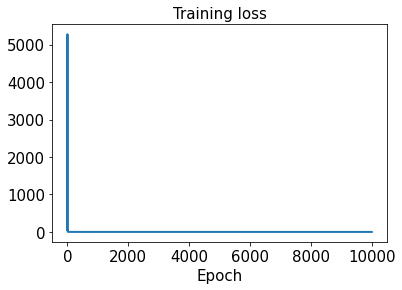

In [9]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

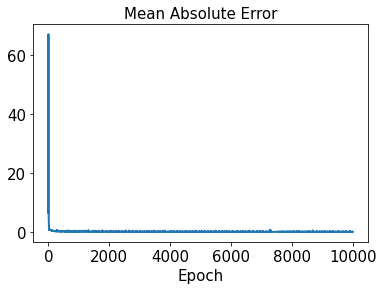

In [10]:
plt.plot(hist['mae'], lw=2)
plt.title('Mean Absolute Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [11]:
test_results = autoencoder.evaluate([x_test, tsr_test])

1/1 [==============================] - 0s 131ms/step - loss: 0.0079 - mae: 0.0000e+00 - mape: 0.0000e+00 - rmse: 0.0000e+00 - msle: 0.0000e+00


In [12]:
decoded_imgs = autoencoder.predict([x_test, tsr_test])

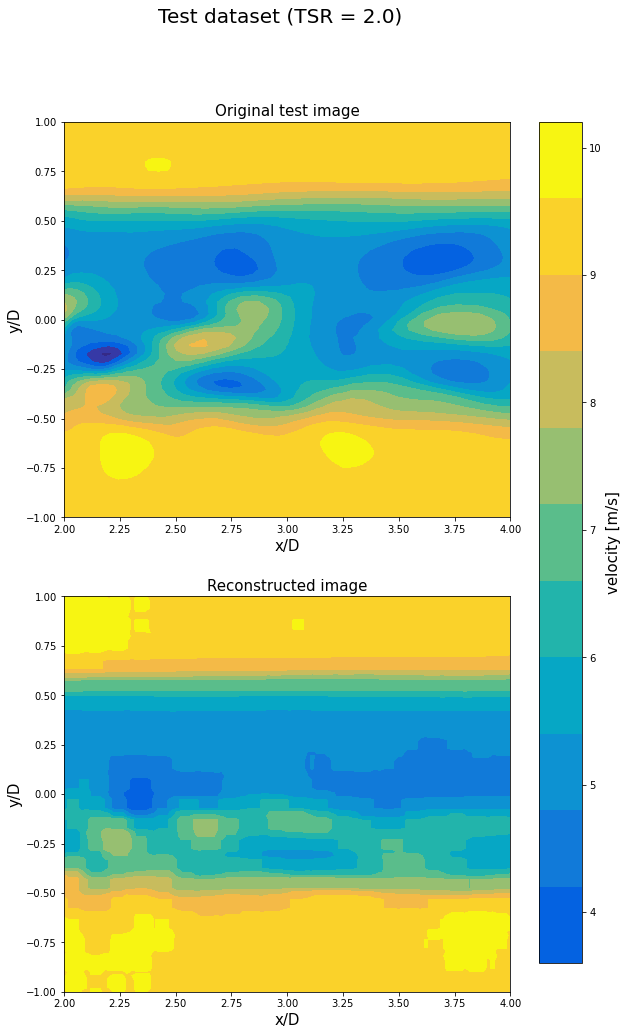

In [13]:
plt.figure(figsize=(8, 16))
xtest_rotate = x_test.T.reshape(100, 100)
decoded_rotate = decoded_imgs.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(-1, 1., 100)
yrange = np.linspace(2, 4, 100)
ymesh, xmesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(2, 1, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, xtest_rotate.T, vmin=3, vmax=10, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(2, 1, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate.T, vmin=3, vmax=10, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)

cax = plt.axes([0.95, 0.15, 0.075, 0.73])
cbar = plt.colorbar(a2, cax=cax)
cbar.set_label('velocity [m/s]', fontsize=15)
cbar.set_ticks([3, 4, 5, 6, 7, 8, 9, 10])

plt.suptitle('Test dataset (TSR = 2.0)',fontsize=20)
plt.show()

In [14]:
error_test = np.abs(decoded_imgs - x_test) / x_test * 100
print(error_test)

[[[[2.9707196]
   [1.6769257]
   [1.658746 ]
   ...
   [2.7281759]
   [2.756252 ]
   [1.5839949]]

  [[1.6630487]
   [1.2126107]
   [1.1913179]
   ...
   [2.209635 ]
   [2.2375677]
   [2.6763208]]

  [[1.6523572]
   [1.1977038]
   [1.177483 ]
   ...
   [2.2031922]
   [2.231121 ]
   [2.6676831]]

  ...

  [[1.5991555]
   [1.3295311]
   [1.381266 ]
   ...
   [1.5065001]
   [1.456843 ]
   [1.5810457]]

  [[1.5829723]
   [1.3122944]
   [1.3489217]
   ...
   [1.5616195]
   [1.511898 ]
   [1.6350703]]

  [[2.1051564]
   [1.3864211]
   [1.4349165]
   ...
   [1.9761685]
   [1.9175429]
   [0.6780875]]]]


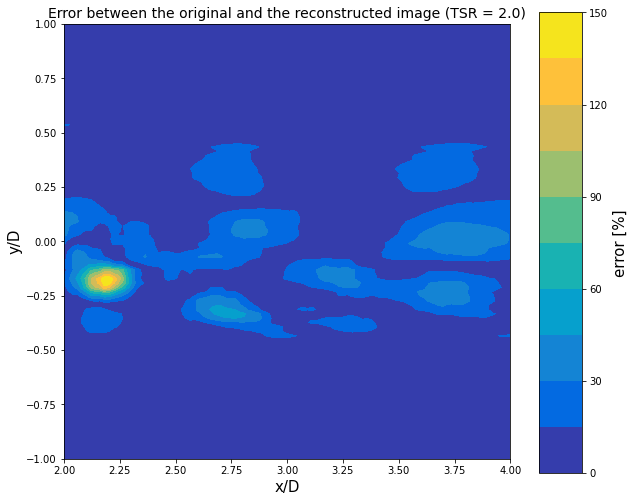

In [15]:
error_test_rotate = error_test.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_rotate.T, levels=11, cmap=parula_map)
ax5.set_title('Error between the original and the reconstructed image (TSR = 2.0)', fontsize=14)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.95, 0.1, 0.075, 0.8])
cbar = plt.colorbar(mappable, cax=cax)
cbar.set_label('error [%]', fontsize=15)

plt.show()

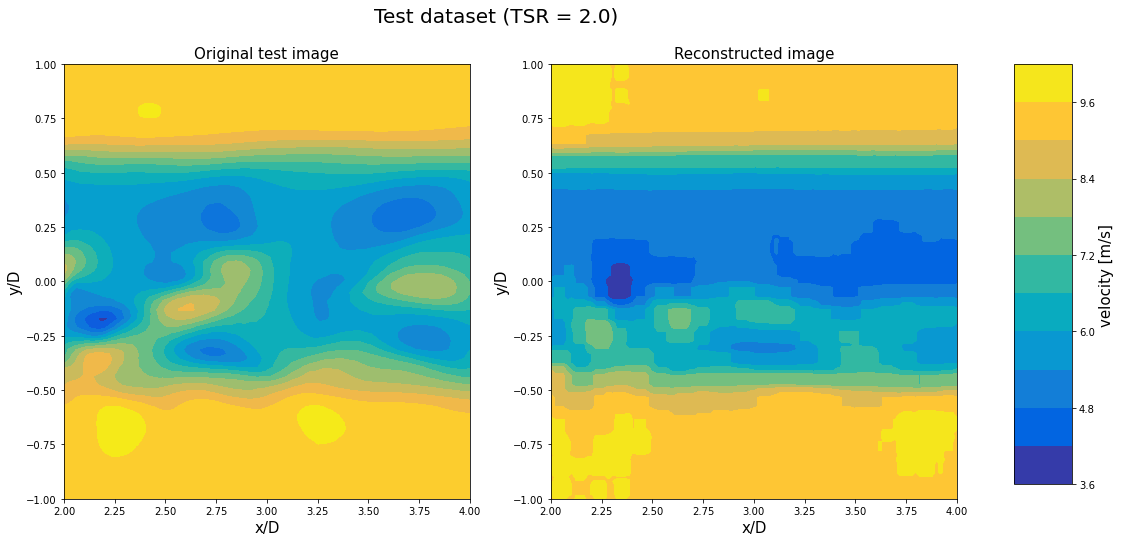

In [16]:
plt.figure(figsize=(16, 8))
xtest_rotate2 = x_test.T.reshape(100, 100)
decoded_rotate2 = decoded_imgs.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(-1, 1., 100)
yrange = np.linspace(2, 4, 100)
ymesh, xmesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, xtest_rotate2.T, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, decoded_rotate2.T, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)

cax = plt.axes([0.95, 0.15, 0.05, 0.73])
cbar = plt.colorbar(cax=cax)
cbar.set_label('velocity [m/s]', fontsize=15)

plt.suptitle('Test dataset (TSR = 2.0)',fontsize=20)
plt.show()

In [17]:
train0 = x_train[0].reshape(1, 100, 100, 1)
train_decode0 = autoencoder.predict([train0, tsr_train[0]]).reshape(100, 100)
print(train_decode0.shape)

(100, 100)


In [18]:
train0_orig = x_train[0].reshape(100, 100)

In [19]:
error_train0 = np.abs(train_decode0 - train0_orig) / train0_orig * 100

In [20]:
print(error_train0)

[[3.5510042  0.98759085 0.983316   ... 0.9749013  0.94400483 3.1640768 ]
 [0.91470665 0.44331235 0.45181373 ... 0.3169722  0.28839645 1.0204086 ]
 [0.98626965 0.53263366 0.5422161  ... 0.3137918  0.28521785 1.0150839 ]
 ...
 [0.934063   0.6190079  0.7457119  ... 0.563408   0.5259763  0.6470775 ]
 [0.9843717  0.66811824 0.78290963 ... 0.5281174  0.50032055 0.6224807 ]
 [2.3739522  1.1135634  1.2376962  ... 0.7681895  0.73070705 1.8715677 ]]


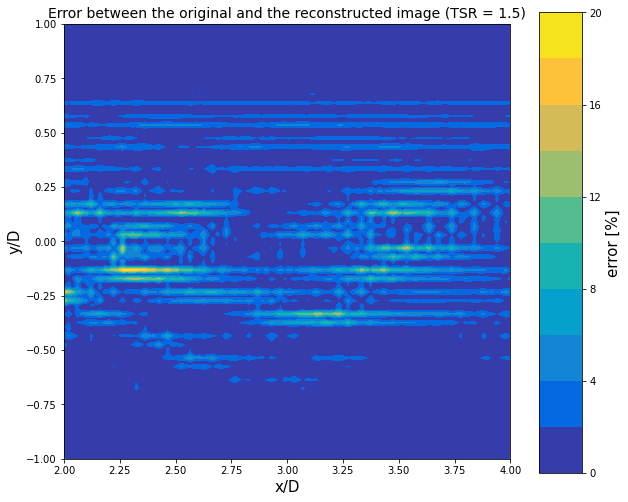

In [21]:
error_train0_rotate = error_train0.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train0_rotate.T, levels=11, cmap=parula_map)
ax5.set_title('Error between the original and the reconstructed image (TSR = 1.5)', fontsize=14)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.95, 0.1, 0.075, 0.8])
cbar = plt.colorbar(mappable, cax=cax)
cbar.set_label('error [%]', fontsize=15)

plt.show()

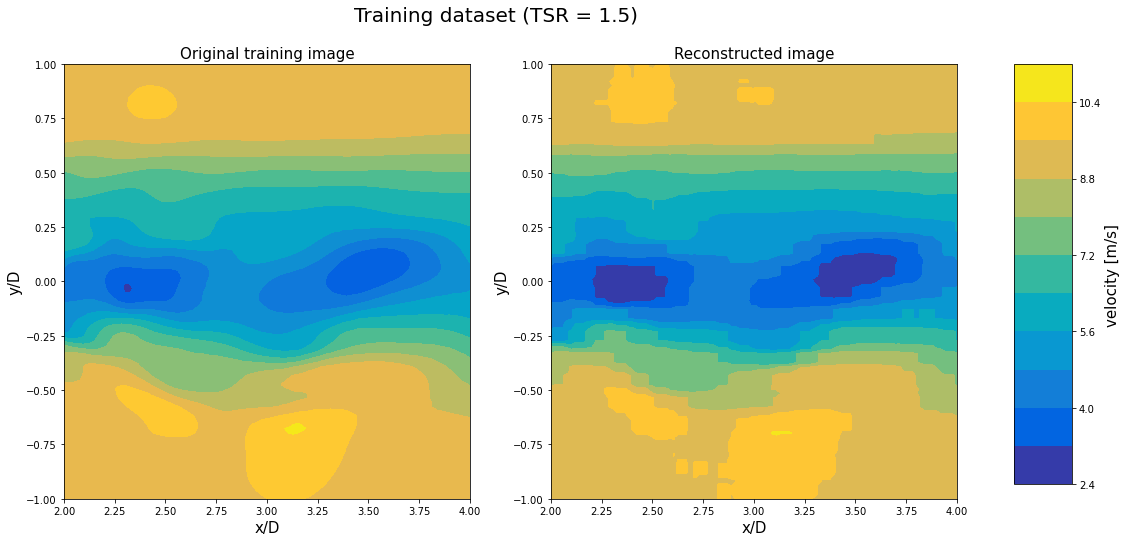

In [22]:
plt.figure(figsize=(16, 8))
#xtest_rotate2 = x_test.T.reshape(100, 100)
#decoded_rotate2 = decoded_imgs.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(-1, 1., 100)
yrange = np.linspace(2, 4, 100)
ymesh, xmesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, train0_orig, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original training image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, train_decode0, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)

cax = plt.axes([0.95, 0.15, 0.05, 0.73])
cbar = plt.colorbar(cax=cax)
cbar.set_label('velocity [m/s]', fontsize=15)

plt.suptitle('Training dataset (TSR = 1.5)',fontsize=20)
plt.show()

In [23]:
print(np.mean(error_train0))

1.3643016


In [24]:
print(np.max(error_train0))

19.349964


In [25]:
print(np.mean(error_test))

7.5195827


In [26]:
print(np.max(error_test))

149.27446
